In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib as mpl
from scipy.optimize import curve_fit
from collections import defaultdict
from scipy.spatial.distance import cdist
mpl.rcParams['axes.linewidth'] = 2
from DEPENDENCIES.recycle import *

In [ ]:
def map_xy(xy, var, nres=50, L=13, nneigh=3):
    dx, dy = L/nres, L/nres
    X, Y = np.arange(0,L,dx), np.arange(0,L,dy)
    frame = np.zeros((nres, nres))
    for i, y in enumerate(Y):
        for j, x in enumerate(X):
            dists = cdist([[x+0.5*dx,y+0.5*dy]], xy)
            ndx = np.argsort(dists[0])[:nneigh]
            frame[i,j] = np.mean(var[ndx])
    return frame

def read_text_xy_map(fname, tini=0, tfin=1000000, nres=50, L=13, dt=800, angstrom=False):
    if angstrom == True:
        fact = 0.1
    else:
        fact = 1.0
    f = open(fname, "r")
    fl = f.readlines()
    f.close()
    
    time = -1
    data, vals = [], []
    for line in fl:
        if "#T - >" in line:
            if vals != []:
                vals = np.array(vals, dtype='float')
                data.append(map_xy(vals[:,:2]*fact, vals[:,2], nres=nres, L=L)) 
            time = int(float(line.split()[3]))
            vals = []
        if time >= tini and time <= tfin and time%dt==0:
            if "#" not in line and "@" not in line:
                vals.append(line.split())
                
    data = np.array(data, dtype='float')
    data_mean = np.mean(data, axis=0)
    data_std = np.std(data, axis=0)
    print("Done with {}".format(fname))
    return data_mean, data_std

In [39]:
def plot_apl(apls, means=[0.6503, 0.7999], delta=0.2, cmap='PuOr', fname='tmp'):
    fig, axs = plt.subplots(figsize=(9,3), ncols=2, subplot_kw={'xticks':[0,24,49], 'yticks':[0,24,49], 'xticklabels':['-7.0','0.0','+7.0'], 'yticklabels':['+7.0','0.0','-7.0']}, gridspec_kw={'wspace':0.4})
    for ax, apl, ave in zip(axs.flatten(), apls, means):
        ax.tick_params(labelsize=Z)
        ax.set_xlabel("X-axis (nm)", fontsize=Z)
        ax.set_ylabel("Y-axis (nm)", fontsize=Z)
        #cax = ax.imshow(apl, cmap=cmap, vmin=ave-delta, vmax=ave+delta, interpolation='bilinear')
        cax = ax.imshow(apl, cmap=cmap, vmin=ave, vmax=ave+delta, interpolation='bilinear')
    a = plt.axes([0.95, 0.14, 0.04, 0.75])
    #cbar = fig.colorbar(cax, ax=a, cax=a, ticks=[ave-delta,ave,ave+delta])
    cbar = fig.colorbar(cax, ax=a, cax=a, ticks=[ave, ave+0.5*delta, ave+delta])
    #cbar.ax.set_yticklabels(["-{:.1f} $nm^2$".format(delta), "Mean", "+{:.1f} $nm^2$".format(delta)])
    cbar.ax.tick_params(labelsize=Z)
    cbar.ax.set_ylabel("Area per lipid ($nm^{2}$)", fontsize=Z)
    plt.savefig("Plots/{}_apl.png".format(fname), format='png', dpi=300, bbox_inches='tight', transparent=True)
    plt.show()
    plt.close()

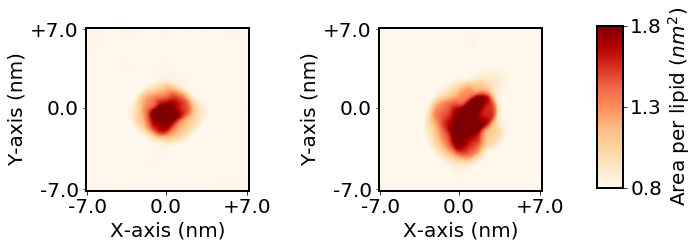

In [40]:
plot_apl(n12_apls, fname='gHNP', delta=1., cmap='OrRd')

In [4]:
p5_apl, p5_apl_std = read_text_xy_map("APL/POPC5-35_PRO1_aplxy_PO4.sfu", tini=0, tfin=1000000, angstrom=True, L=15.0)
p6_apl, p6_apl_std = read_text_xy_map("APL/POPC6-35_PRO1_aplxy_PO4.sfu", tini=0, tfin=1000000, angstrom=True, L=12.0)
g5_apl, g5_apl_std = read_text_xy_map("APL/gH-POPC5-46_PRO1_aplxy_PO4.sfu", tini=780000, tfin=1000000, angstrom=True, L=15.0)
g6_apl, g6_apl_std = read_text_xy_map("APL/gH-POPC6-46_PRO1_aplxy_PO4.sfu", tini=50000, tfin=1000000, angstrom=True, L=12.0)
n05_apl, n05_apl_std = read_text_xy_map("APL/NP610-POPC5-46_PRO1-8_aplxy_PO4.sfu", tini=1329000, tfin=2000000, angstrom=True, L=15.0)
n06_apl, n06_apl_std = read_text_xy_map("APL/NP610-POPC6-46_PRO1_aplxy_PO4.sfu", tini=215000, tfin=1000000, angstrom=True, L=12.0)
n15_apl, n15_apl_std = read_text_xy_map("APL/NP61-POPC5-46_PRO3_aplxy_PO4.sfu", tini=2895000, tfin=3000000, angstrom=True, L=15.0)
n161_apl, n161_apl_std = read_text_xy_map("APL/NP61-POPC6-46_PRO1_aplxy_PO4.sfu", tini=126000, tfin=864000, angstrom=True, L=12.0)
n162_apl, n162_apl_std = read_text_xy_map("APL/NP61-POPC6-46_PRO1_aplxy_PO4.sfu", tini=864000, tfin=1000000, angstrom=True, L=12.0)

0
80
160
240
320
400
480
560
640
720
800
880
960
1040
1120
1200
1280
1360
1440
1520
1600
1680
1760
1840
1920
2000
2080
2160
2240
2320
2400
2480
2560
2640
2720
2800
2880
2960
3040
3120
3200
3280
3360
3440
3520
3600
3680
3760
3840
3920
4000
4080
4160
4240
4320
4400
4480
4560
4640
4720
4800
4880
4960
5040
5120
5200
5280
5360
5440
5520
5600
5680
5760
5840
5920
6000
6080
6160
6240
6320
6400
6480
6560
6640
6720
6800
6880
6960
7040
7120
7200
7280
7360
7440
7520
7600
7680
7760
7840
7920
8000
8080
8160
8240
8320
8400
8480
8560
8640
8720
8800
8880
8960
9040
9120
9200
9280
9360
9440
9520
9600
9680
9760
9840
9920
10000
10080
10160
10240
10320
10400
10480
10560
10640
10720
10800
10880
10960
11040
11120
11200
11280
11360
11440
11520
11600
11680
11760
11840
11920
12000
12080
12160
12240
12320
12400
12480
12560
12640
12720
12800
12880
12960
13040
13120
13200
13280
13360
13440
13520
13600
13680
13760
13840
13920
14000
14080
14160
14240
14320
14400
14480
14560
14640
14720
14800
14880
14960
15040
15120
1

110480
110560
110640
110720
110800
110880
110960
111040
111120
111200
111280
111360
111440
111520
111600
111680
111760
111840
111920
112000
112080
112160
112240
112320
112400
112480
112560
112640
112720
112800
112880
112960
113040
113120
113200
113280
113360
113440
113520
113600
113680
113760
113840
113920
114000
114080
114160
114240
114320
114400
114480
114560
114640
114720
114800
114880
114960
115040
115120
115200
115280
115360
115440
115520
115600
115680
115760
115840
115920
116000
116080
116160
116240
116320
116400
116480
116560
116640
116720
116800
116880
116960
117040
117120
117200
117280
117360
117440
117520
117600
117680
117760
117840
117920
118000
118080
118160
118240
118320
118400
118480
118560
118640
118720
118800
118880
118960
119040
119120
119200
119280
119360
119440
119520
119600
119680
119760
119840
119920
120000
120080
120160
120240
120320
120400
120480
120560
120640
120720
120800
120880
120960
121040
121120
121200
121280
121360
121440
121520
121600
121680
121760
121840

204880
204960
205040
205120
205200
205280
205360
205440
205520
205600
205680
205760
205840
205920
206000
206080
206160
206240
206320
206400
206480
206560
206640
206720
206800
206880
206960
207040
207120
207200
207280
207360
207440
207520
207600
207680
207760
207840
207920
208000
208080
208160
208240
208320
208400
208480
208560
208640
208720
208800
208880
208960
209040
209120
209200
209280
209360
209440
209520
209600
209680
209760
209840
209920
210000
210080
210160
210240
210320
210400
210480
210560
210640
210720
210800
210880
210960
211040
211120
211200
211280
211360
211440
211520
211600
211680
211760
211840
211920
212000
212080
212160
212240
212320
212400
212480
212560
212640
212720
212800
212880
212960
213040
213120
213200
213280
213360
213440
213520
213600
213680
213760
213840
213920
214000
214080
214160
214240
214320
214400
214480
214560
214640
214720
214800
214880
214960
215040
215120
215200
215280
215360
215440
215520
215600
215680
215760
215840
215920
216000
216080
216160
216240

299280
299360
299440
299520
299600
299680
299760
299840
299920
300000
300080
300160
300240
300320
300400
300480
300560
300640
300720
300800
300880
300960
301040
301120
301200
301280
301360
301440
301520
301600
301680
301760
301840
301920
302000
302080
302160
302240
302320
302400
302480
302560
302640
302720
302800
302880
302960
303040
303120
303200
303280
303360
303440
303520
303600
303680
303760
303840
303920
304000
304080
304160
304240
304320
304400
304480
304560
304640
304720
304800
304880
304960
305040
305120
305200
305280
305360
305440
305520
305600
305680
305760
305840
305920
306000
306080
306160
306240
306320
306400
306480
306560
306640
306720
306800
306880
306960
307040
307120
307200
307280
307360
307440
307520
307600
307680
307760
307840
307920
308000
308080
308160
308240
308320
308400
308480
308560
308640
308720
308800
308880
308960
309040
309120
309200
309280
309360
309440
309520
309600
309680
309760
309840
309920
310000
310080
310160
310240
310320
310400
310480
310560
310640

393680
393760
393840
393920
394000
394080
394160
394240
394320
394400
394480
394560
394640
394720
394800
394880
394960
395040
395120
395200
395280
395360
395440
395520
395600
395680
395760
395840
395920
396000
396080
396160
396240
396320
396400
396480
396560
396640
396720
396800
396880
396960
397040
397120
397200
397280
397360
397440
397520
397600
397680
397760
397840
397920
398000
398080
398160
398240
398320
398400
398480
398560
398640
398720
398800
398880
398960
399040
399120
399200
399280
399360
399440
399520
399600
399680
399760
399840
399920
400000
400080
400160
400240
400320
400400
400480
400560
400640
400720
400800
400880
400960
401040
401120
401200
401280
401360
401440
401520
401600
401680
401760
401840
401920
402000
402080
402160
402240
402320
402400
402480
402560
402640
402720
402800
402880
402960
403040
403120
403200
403280
403360
403440
403520
403600
403680
403760
403840
403920
404000
404080
404160
404240
404320
404400
404480
404560
404640
404720
404800
404880
404960
405040

488080
488160
488240
488320
488400
488480
488560
488640
488720
488800
488880
488960
489040
489120
489200
489280
489360
489440
489520
489600
489680
489760
489840
489920
490000
490080
490160
490240
490320
490400
490480
490560
490640
490720
490800
490880
490960
491040
491120
491200
491280
491360
491440
491520
491600
491680
491760
491840
491920
492000
492080
492160
492240
492320
492400
492480
492560
492640
492720
492800
492880
492960
493040
493120
493200
493280
493360
493440
493520
493600
493680
493760
493840
493920
494000
494080
494160
494240
494320
494400
494480
494560
494640
494720
494800
494880
494960
495040
495120
495200
495280
495360
495440
495520
495600
495680
495760
495840
495920
496000
496080
496160
496240
496320
496400
496480
496560
496640
496720
496800
496880
496960
497040
497120
497200
497280
497360
497440
497520
497600
497680
497760
497840
497920
498000
498080
498160
498240
498320
498400
498480
498560
498640
498720
498800
498880
498960
499040
499120
499200
499280
499360
499440

582480
582560
582640
582720
582800
582880
582960
583040
583120
583200
583280
583360
583440
583520
583600
583680
583760
583840
583920
584000
584080
584160
584240
584320
584400
584480
584560
584640
584720
584800
584880
584960
585040
585120
585200
585280
585360
585440
585520
585600
585680
585760
585840
585920
586000
586080
586160
586240
586320
586400
586480
586560
586640
586720
586800
586880
586960
587040
587120
587200
587280
587360
587440
587520
587600
587680
587760
587840
587920
588000
588080
588160
588240
588320
588400
588480
588560
588640
588720
588800
588880
588960
589040
589120
589200
589280
589360
589440
589520
589600
589680
589760
589840
589920
590000
590080
590160
590240
590320
590400
590480
590560
590640
590720
590800
590880
590960
591040
591120
591200
591280
591360
591440
591520
591600
591680
591760
591840
591920
592000
592080
592160
592240
592320
592400
592480
592560
592640
592720
592800
592880
592960
593040
593120
593200
593280
593360
593440
593520
593600
593680
593760
593840

676880
676960
677040
677120
677200
677280
677360
677440
677520
677600
677680
677760
677840
677920
678000
678080
678160
678240
678320
678400
678480
678560
678640
678720
678800
678880
678960
679040
679120
679200
679280
679360
679440
679520
679600
679680
679760
679840
679920
680000
680080
680160
680240
680320
680400
680480
680560
680640
680720
680800
680880
680960
681040
681120
681200
681280
681360
681440
681520
681600
681680
681760
681840
681920
682000
682080
682160
682240
682320
682400
682480
682560
682640
682720
682800
682880
682960
683040
683120
683200
683280
683360
683440
683520
683600
683680
683760
683840
683920
684000
684080
684160
684240
684320
684400
684480
684560
684640
684720
684800
684880
684960
685040
685120
685200
685280
685360
685440
685520
685600
685680
685760
685840
685920
686000
686080
686160
686240
686320
686400
686480
686560
686640
686720
686800
686880
686960
687040
687120
687200
687280
687360
687440
687520
687600
687680
687760
687840
687920
688000
688080
688160
688240

771280
771360
771440
771520
771600
771680
771760
771840
771920
772000
772080
772160
772240
772320
772400
772480
772560
772640
772720
772800
772880
772960
773040
773120
773200
773280
773360
773440
773520
773600
773680
773760
773840
773920
774000
774080
774160
774240
774320
774400
774480
774560
774640
774720
774800
774880
774960
775040
775120
775200
775280
775360
775440
775520
775600
775680
775760
775840
775920
776000
776080
776160
776240
776320
776400
776480
776560
776640
776720
776800
776880
776960
777040
777120
777200
777280
777360
777440
777520
777600
777680
777760
777840
777920
778000
778080
778160
778240
778320
778400
778480
778560
778640
778720
778800
778880
778960
779040
779120
779200
779280
779360
779440
779520
779600
779680
779760
779840
779920
780000
780080
780160
780240
780320
780400
780480
780560
780640
780720
780800
780880
780960
781040
781120
781200
781280
781360
781440
781520
781600
781680
781760
781840
781920
782000
782080
782160
782240
782320
782400
782480
782560
782640

865680
865760
865840
865920
866000
866080
866160
866240
866320
866400
866480
866560
866640
866720
866800
866880
866960
867040
867120
867200
867280
867360
867440
867520
867600
867680
867760
867840
867920
868000
868080
868160
868240
868320
868400
868480
868560
868640
868720
868800
868880
868960
869040
869120
869200
869280
869360
869440
869520
869600
869680
869760
869840
869920
870000
870080
870160
870240
870320
870400
870480
870560
870640
870720
870800
870880
870960
871040
871120
871200
871280
871360
871440
871520
871600
871680
871760
871840
871920
872000
872080
872160
872240
872320
872400
872480
872560
872640
872720
872800
872880
872960
873040
873120
873200
873280
873360
873440
873520
873600
873680
873760
873840
873920
874000
874080
874160
874240
874320
874400
874480
874560
874640
874720
874800
874880
874960
875040
875120
875200
875280
875360
875440
875520
875600
875680
875760
875840
875920
876000
876080
876160
876240
876320
876400
876480
876560
876640
876720
876800
876880
876960
877040

960880
960960
961040
961120
961200
961280
961360
961440
961520
961600
961680
961760
961840
961920
962000
962080
962160
962240
962320
962400
962480
962560
962640
962720
962800
962880
962960
963040
963120
963200
963280
963360
963440
963520
963600
963680
963760
963840
963920
964000
964080
964160
964240
964320
964400
964480
964560
964640
964720
964800
964880
964960
965040
965120
965200
965280
965360
965440
965520
965600
965680
965760
965840
965920
966000
966080
966160
966240
966320
966400
966480
966560
966640
966720
966800
966880
966960
967040
967120
967200
967280
967360
967440
967520
967600
967680
967760
967840
967920
968000
968080
968160
968240
968320
968400
968480
968560
968640
968720
968800
968880
968960
969040
969120
969200
969280
969360
969440
969520
969600
969680
969760
969840
969920
970000
970080
970160
970240
970320
970400
970480
970560
970640
970720
970800
970880
970960
971040
971120
971200
971280
971360
971440
971520
971600
971680
971760
971840
971920
972000
972080
972160
972240

65680
65760
65840
65920
66000
66080
66160
66240
66320
66400
66480
66560
66640
66720
66800
66880
66960
67040
67120
67200
67280
67360
67440
67520
67600
67680
67760
67840
67920
68000
68080
68160
68240
68320
68400
68480
68560
68640
68720
68800
68880
68960
69040
69120
69200
69280
69360
69440
69520
69600
69680
69760
69840
69920
70000
70080
70160
70240
70320
70400
70480
70560
70640
70720
70800
70880
70960
71040
71120
71200
71280
71360
71440
71520
71600
71680
71760
71840
71920
72000
72080
72160
72240
72320
72400
72480
72560
72640
72720
72800
72880
72960
73040
73120
73200
73280
73360
73440
73520
73600
73680
73760
73840
73920
74000
74080
74160
74240
74320
74400
74480
74560
74640
74720
74800
74880
74960
75040
75120
75200
75280
75360
75440
75520
75600
75680
75760
75840
75920
76000
76080
76160
76240
76320
76400
76480
76560
76640
76720
76800
76880
76960
77040
77120
77200
77280
77360
77440
77520
77600
77680
77760
77840
77920
78000
78080
78160
78240
78320
78400
78480
78560
78640
78720
78800
78880
7896

165680
165760
165840
165920
166000
166080
166160
166240
166320
166400
166480
166560
166640
166720
166800
166880
166960
167040
167120
167200
167280
167360
167440
167520
167600
167680
167760
167840
167920
168000
168080
168160
168240
168320
168400
168480
168560
168640
168720
168800
168880
168960
169040
169120
169200
169280
169360
169440
169520
169600
169680
169760
169840
169920
170000
170080
170160
170240
170320
170400
170480
170560
170640
170720
170800
170880
170960
171040
171120
171200
171280
171360
171440
171520
171600
171680
171760
171840
171920
172000
172080
172160
172240
172320
172400
172480
172560
172640
172720
172800
172880
172960
173040
173120
173200
173280
173360
173440
173520
173600
173680
173760
173840
173920
174000
174080
174160
174240
174320
174400
174480
174560
174640
174720
174800
174880
174960
175040
175120
175200
175280
175360
175440
175520
175600
175680
175760
175840
175920
176000
176080
176160
176240
176320
176400
176480
176560
176640
176720
176800
176880
176960
177040

260080
260160
260240
260320
260400
260480
260560
260640
260720
260800
260880
260960
261040
261120
261200
261280
261360
261440
261520
261600
261680
261760
261840
261920
262000
262080
262160
262240
262320
262400
262480
262560
262640
262720
262800
262880
262960
263040
263120
263200
263280
263360
263440
263520
263600
263680
263760
263840
263920
264000
264080
264160
264240
264320
264400
264480
264560
264640
264720
264800
264880
264960
265040
265120
265200
265280
265360
265440
265520
265600
265680
265760
265840
265920
266000
266080
266160
266240
266320
266400
266480
266560
266640
266720
266800
266880
266960
267040
267120
267200
267280
267360
267440
267520
267600
267680
267760
267840
267920
268000
268080
268160
268240
268320
268400
268480
268560
268640
268720
268800
268880
268960
269040
269120
269200
269280
269360
269440
269520
269600
269680
269760
269840
269920
270000
270080
270160
270240
270320
270400
270480
270560
270640
270720
270800
270880
270960
271040
271120
271200
271280
271360
271440

354480
354560
354640
354720
354800
354880
354960
355040
355120
355200
355280
355360
355440
355520
355600
355680
355760
355840
355920
356000
356080
356160
356240
356320
356400
356480
356560
356640
356720
356800
356880
356960
357040
357120
357200
357280
357360
357440
357520
357600
357680
357760
357840
357920
358000
358080
358160
358240
358320
358400
358480
358560
358640
358720
358800
358880
358960
359040
359120
359200
359280
359360
359440
359520
359600
359680
359760
359840
359920
360000
360080
360160
360240
360320
360400
360480
360560
360640
360720
360800
360880
360960
361040
361120
361200
361280
361360
361440
361520
361600
361680
361760
361840
361920
362000
362080
362160
362240
362320
362400
362480
362560
362640
362720
362800
362880
362960
363040
363120
363200
363280
363360
363440
363520
363600
363680
363760
363840
363920
364000
364080
364160
364240
364320
364400
364480
364560
364640
364720
364800
364880
364960
365040
365120
365200
365280
365360
365440
365520
365600
365680
365760
365840

449680
449760
449840
449920
450000
450080
450160
450240
450320
450400
450480
450560
450640
450720
450800
450880
450960
451040
451120
451200
451280
451360
451440
451520
451600
451680
451760
451840
451920
452000
452080
452160
452240
452320
452400
452480
452560
452640
452720
452800
452880
452960
453040
453120
453200
453280
453360
453440
453520
453600
453680
453760
453840
453920
454000
454080
454160
454240
454320
454400
454480
454560
454640
454720
454800
454880
454960
455040
455120
455200
455280
455360
455440
455520
455600
455680
455760
455840
455920
456000
456080
456160
456240
456320
456400
456480
456560
456640
456720
456800
456880
456960
457040
457120
457200
457280
457360
457440
457520
457600
457680
457760
457840
457920
458000
458080
458160
458240
458320
458400
458480
458560
458640
458720
458800
458880
458960
459040
459120
459200
459280
459360
459440
459520
459600
459680
459760
459840
459920
460000
460080
460160
460240
460320
460400
460480
460560
460640
460720
460800
460880
460960
461040

543680
543760
543840
543920
544000
544080
544160
544240
544320
544400
544480
544560
544640
544720
544800
544880
544960
545040
545120
545200
545280
545360
545440
545520
545600
545680
545760
545840
545920
546000
546080
546160
546240
546320
546400
546480
546560
546640
546720
546800
546880
546960
547040
547120
547200
547280
547360
547440
547520
547600
547680
547760
547840
547920
548000
548080
548160
548240
548320
548400
548480
548560
548640
548720
548800
548880
548960
549040
549120
549200
549280
549360
549440
549520
549600
549680
549760
549840
549920
550000
550080
550160
550240
550320
550400
550480
550560
550640
550720
550800
550880
550960
551040
551120
551200
551280
551360
551440
551520
551600
551680
551760
551840
551920
552000
552080
552160
552240
552320
552400
552480
552560
552640
552720
552800
552880
552960
553040
553120
553200
553280
553360
553440
553520
553600
553680
553760
553840
553920
554000
554080
554160
554240
554320
554400
554480
554560
554640
554720
554800
554880
554960
555040

637680
637760
637840
637920
638000
638080
638160
638240
638320
638400
638480
638560
638640
638720
638800
638880
638960
639040
639120
639200
639280
639360
639440
639520
639600
639680
639760
639840
639920
640000
640080
640160
640240
640320
640400
640480
640560
640640
640720
640800
640880
640960
641040
641120
641200
641280
641360
641440
641520
641600
641680
641760
641840
641920
642000
642080
642160
642240
642320
642400
642480
642560
642640
642720
642800
642880
642960
643040
643120
643200
643280
643360
643440
643520
643600
643680
643760
643840
643920
644000
644080
644160
644240
644320
644400
644480
644560
644640
644720
644800
644880
644960
645040
645120
645200
645280
645360
645440
645520
645600
645680
645760
645840
645920
646000
646080
646160
646240
646320
646400
646480
646560
646640
646720
646800
646880
646960
647040
647120
647200
647280
647360
647440
647520
647600
647680
647760
647840
647920
648000
648080
648160
648240
648320
648400
648480
648560
648640
648720
648800
648880
648960
649040

732880
732960
733040
733120
733200
733280
733360
733440
733520
733600
733680
733760
733840
733920
734000
734080
734160
734240
734320
734400
734480
734560
734640
734720
734800
734880
734960
735040
735120
735200
735280
735360
735440
735520
735600
735680
735760
735840
735920
736000
736080
736160
736240
736320
736400
736480
736560
736640
736720
736800
736880
736960
737040
737120
737200
737280
737360
737440
737520
737600
737680
737760
737840
737920
738000
738080
738160
738240
738320
738400
738480
738560
738640
738720
738800
738880
738960
739040
739120
739200
739280
739360
739440
739520
739600
739680
739760
739840
739920
740000
740080
740160
740240
740320
740400
740480
740560
740640
740720
740800
740880
740960
741040
741120
741200
741280
741360
741440
741520
741600
741680
741760
741840
741920
742000
742080
742160
742240
742320
742400
742480
742560
742640
742720
742800
742880
742960
743040
743120
743200
743280
743360
743440
743520
743600
743680
743760
743840
743920
744000
744080
744160
744240

828080
828160
828240
828320
828400
828480
828560
828640
828720
828800
828880
828960
829040
829120
829200
829280
829360
829440
829520
829600
829680
829760
829840
829920
830000
830080
830160
830240
830320
830400
830480
830560
830640
830720
830800
830880
830960
831040
831120
831200
831280
831360
831440
831520
831600
831680
831760
831840
831920
832000
832080
832160
832240
832320
832400
832480
832560
832640
832720
832800
832880
832960
833040
833120
833200
833280
833360
833440
833520
833600
833680
833760
833840
833920
834000
834080
834160
834240
834320
834400
834480
834560
834640
834720
834800
834880
834960
835040
835120
835200
835280
835360
835440
835520
835600
835680
835760
835840
835920
836000
836080
836160
836240
836320
836400
836480
836560
836640
836720
836800
836880
836960
837040
837120
837200
837280
837360
837440
837520
837600
837680
837760
837840
837920
838000
838080
838160
838240
838320
838400
838480
838560
838640
838720
838800
838880
838960
839040
839120
839200
839280
839360
839440

922480
922560
922640
922720
922800
922880
922960
923040
923120
923200
923280
923360
923440
923520
923600
923680
923760
923840
923920
924000
924080
924160
924240
924320
924400
924480
924560
924640
924720
924800
924880
924960
925040
925120
925200
925280
925360
925440
925520
925600
925680
925760
925840
925920
926000
926080
926160
926240
926320
926400
926480
926560
926640
926720
926800
926880
926960
927040
927120
927200
927280
927360
927440
927520
927600
927680
927760
927840
927920
928000
928080
928160
928240
928320
928400
928480
928560
928640
928720
928800
928880
928960
929040
929120
929200
929280
929360
929440
929520
929600
929680
929760
929840
929920
930000
930080
930160
930240
930320
930400
930480
930560
930640
930720
930800
930880
930960
931040
931120
931200
931280
931360
931440
931520
931600
931680
931760
931840
931920
932000
932080
932160
932240
932320
932400
932480
932560
932640
932720
932800
932880
932960
933040
933120
933200
933280
933360
933440
933520
933600
933680
933760
933840

147920
148000
148080
148160
148240
148320
148400
148480
148560
148640
148720
148800
148880
148960
149040
149120
149200
149280
149360
149440
149520
149600
149680
149760
149840
149920
150000
150080
150160
150240
150320
150400
150480
150560
150640
150720
150800
150880
150960
151040
151120
151200
151280
151360
151440
151520
151600
151680
151760
151840
151920
152000
152080
152160
152240
152320
152400
152480
152560
152640
152720
152800
152880
152960
153040
153120
153200
153280
153360
153440
153520
153600
153680
153760
153840
153920
154000
154080
154160
154240
154320
154400
154480
154560
154640
154720
154800
154880
154960
155040
155120
155200
155280
155360
155440
155520
155600
155680
155760
155840
155920
156000
156080
156160
156240
156320
156400
156480
156560
156640
156720
156800
156880
156960
157040
157120
157200
157280
157360
157440
157520
157600
157680
157760
157840
157920
158000
158080
158160
158240
158320
158400
158480
158560
158640
158720
158800
158880
158960
159040
159120
159200
159280

296800
296880
296960
297040
297120
297200
297280
297360
297440
297520
297600
297680
297760
297840
297920
298000
298080
298160
298240
298320
298400
298480
298560
298640
298720
298800
298880
298960
299040
299120
299200
299280
299360
299440
299520
299600
299680
299760
299840
299920
300000
300080
300160
300240
300320
300400
300480
300560
300640
300720
300800
300880
300960
301040
301120
301200
301280
301360
301440
301520
301600
301680
301760
301840
301920
302000
302080
302160
302240
302320
302400
302480
302560
302640
302720
302800
302880
302960
303040
303120
303200
303280
303360
303440
303520
303600
303680
303760
303840
303920
304000
304080
304160
304240
304320
304400
304480
304560
304640
304720
304800
304880
304960
305040
305120
305200
305280
305360
305440
305520
305600
305680
305760
305840
305920
306000
306080
306160
306240
306320
306400
306480
306560
306640
306720
306800
306880
306960
307040
307120
307200
307280
307360
307440
307520
307600
307680
307760
307840
307920
308000
308080
308160

442880
442960
443040
443120
443200
443280
443360
443440
443520
443600
443680
443760
443840
443920
444000
444080
444160
444240
444320
444400
444480
444560
444640
444720
444800
444880
444960
445040
445120
445200
445280
445360
445440
445520
445600
445680
445760
445840
445920
446000
446080
446160
446240
446320
446400
446480
446560
446640
446720
446800
446880
446960
447040
447120
447200
447280
447360
447440
447520
447600
447680
447760
447840
447920
448000
448080
448160
448240
448320
448400
448480
448560
448640
448720
448800
448880
448960
449040
449120
449200
449280
449360
449440
449520
449600
449680
449760
449840
449920
450000
450080
450160
450240
450320
450400
450480
450560
450640
450720
450800
450880
450960
451040
451120
451200
451280
451360
451440
451520
451600
451680
451760
451840
451920
452000
452080
452160
452240
452320
452400
452480
452560
452640
452720
452800
452880
452960
453040
453120
453200
453280
453360
453440
453520
453600
453680
453760
453840
453920
454000
454080
454160
454240

551360
551440
551520
551600
551680
551760
551840
551920
552000
552080
552160
552240
552320
552400
552480
552560
552640
552720
552800
552880
552960
553040
553120
553200
553280
553360
553440
553520
553600
553680
553760
553840
553920
554000
554080
554160
554240
554320
554400
554480
554560
554640
554720
554800
554880
554960
555040
555120
555200
555280
555360
555440
555520
555600
555680
555760
555840
555920
556000
556080
556160
556240
556320
556400
556480
556560
556640
556720
556800
556880
556960
557040
557120
557200
557280
557360
557440
557520
557600
557680
557760
557840
557920
558000
558080
558160
558240
558320
558400
558480
558560
558640
558720
558800
558880
558960
559040
559120
559200
559280
559360
559440
559520
559600
559680
559760
559840
559920
560000
560080
560160
560240
560320
560400
560480
560560
560640
560720
560800
560880
560960
561040
561120
561200
561280
561360
561440
561520
561600
561680
561760
561840
561920
562000
562080
562160
562240
562320
562400
562480
562560
562640
562720

709920
710000
710080
710160
710240
710320
710400
710480
710560
710640
710720
710800
710880
710960
711040
711120
711200
711280
711360
711440
711520
711600
711680
711760
711840
711920
712000
712080
712160
712240
712320
712400
712480
712560
712640
712720
712800
712880
712960
713040
713120
713200
713280
713360
713440
713520
713600
713680
713760
713840
713920
714000
714080
714160
714240
714320
714400
714480
714560
714640
714720
714800
714880
714960
715040
715120
715200
715280
715360
715440
715520
715600
715680
715760
715840
715920
716000
716080
716160
716240
716320
716400
716480
716560
716640
716720
716800
716880
716960
717040
717120
717200
717280
717360
717440
717520
717600
717680
717760
717840
717920
718000
718080
718160
718240
718320
718400
718480
718560
718640
718720
718800
718880
718960
719040
719120
719200
719280
719360
719440
719520
719600
719680
719760
719840
719920
720000
720080
720160
720240
720320
720400
720480
720560
720640
720720
720800
720880
720960
721040
721120
721200
721280

804080
804160
804240
804320
804400
804480
804560
804640
804720
804800
804880
804960
805040
805120
805200
805280
805360
805440
805520
805600
805680
805760
805840
805920
806000
806080
806160
806240
806320
806400
806480
806560
806640
806720
806800
806880
806960
807040
807120
807200
807280
807360
807440
807520
807600
807680
807760
807840
807920
808000
808080
808160
808240
808320
808400
808480
808560
808640
808720
808800
808880
808960
809040
809120
809200
809280
809360
809440
809520
809600
809680
809760
809840
809920
810000
810080
810160
810240
810320
810400
810480
810560
810640
810720
810800
810880
810960
811040
811120
811200
811280
811360
811440
811520
811600
811680
811760
811840
811920
812000
812080
812160
812240
812320
812400
812480
812560
812640
812720
812800
812880
812960
813040
813120
813200
813280
813360
813440
813520
813600
813680
813760
813840
813920
814000
814080
814160
814240
814320
814400
814480
814560
814640
814720
814800
814880
814960
815040
815120
815200
815280
815360
815440

898480
898560
898640
898720
898800
898880
898960
899040
899120
899200
899280
899360
899440
899520
899600
899680
899760
899840
899920
900000
900080
900160
900240
900320
900400
900480
900560
900640
900720
900800
900880
900960
901040
901120
901200
901280
901360
901440
901520
901600
901680
901760
901840
901920
902000
902080
902160
902240
902320
902400
902480
902560
902640
902720
902800
902880
902960
903040
903120
903200
903280
903360
903440
903520
903600
903680
903760
903840
903920
904000
904080
904160
904240
904320
904400
904480
904560
904640
904720
904800
904880
904960
905040
905120
905200
905280
905360
905440
905520
905600
905680
905760
905840
905920
906000
906080
906160
906240
906320
906400
906480
906560
906640
906720
906800
906880
906960
907040
907120
907200
907280
907360
907440
907520
907600
907680
907760
907840
907920
908000
908080
908160
908240
908320
908400
908480
908560
908640
908720
908800
908880
908960
909040
909120
909200
909280
909360
909440
909520
909600
909680
909760
909840

993680
993760
993840
993920
994000
994080
994160
994240
994320
994400
994480
994560
994640
994720
994800
994880
994960
995040
995120
995200
995280
995360
995440
995520
995600
995680
995760
995840
995920
996000
996080
996160
996240
996320
996400
996480
996560
996640
996720
996800
996880
996960
997040
997120
997200
997280
997360
997440
997520
997600
997680
997760
997840
997920
998000
998080
998160
998240
998320
998400
998480
998560
998640
998720
998800
998880
998960
999040
999120
999200
999280
999360
999440
999520
999600
999680
999760
999840
999920
1000000
Done with APL/gH-POPC5-46_PRO1_aplxy_PO4.sfu
0
80
160
240
320
400
480
560
640
720
800
880
960
1040
1120
1200
1280
1360
1440
1520
1600
1680
1760
1840
1920
2000
2080
2160
2240
2320
2400
2480
2560
2640
2720
2800
2880
2960
3040
3120
3200
3280
3360
3440
3520
3600
3680
3760
3840
3920
4000
4080
4160
4240
4320
4400
4480
4560
4640
4720
4800
4880
4960
5040
5120
5200
5280
5360
5440
5520
5600
5680
5760
5840
5920
6000
6080
6160
6240
6320
6400
6480


103280
103360
103440
103520
103600
103680
103760
103840
103920
104000
104080
104160
104240
104320
104400
104480
104560
104640
104720
104800
104880
104960
105040
105120
105200
105280
105360
105440
105520
105600
105680
105760
105840
105920
106000
106080
106160
106240
106320
106400
106480
106560
106640
106720
106800
106880
106960
107040
107120
107200
107280
107360
107440
107520
107600
107680
107760
107840
107920
108000
108080
108160
108240
108320
108400
108480
108560
108640
108720
108800
108880
108960
109040
109120
109200
109280
109360
109440
109520
109600
109680
109760
109840
109920
110000
110080
110160
110240
110320
110400
110480
110560
110640
110720
110800
110880
110960
111040
111120
111200
111280
111360
111440
111520
111600
111680
111760
111840
111920
112000
112080
112160
112240
112320
112400
112480
112560
112640
112720
112800
112880
112960
113040
113120
113200
113280
113360
113440
113520
113600
113680
113760
113840
113920
114000
114080
114160
114240
114320
114400
114480
114560
114640

198480
198560
198640
198720
198800
198880
198960
199040
199120
199200
199280
199360
199440
199520
199600
199680
199760
199840
199920
200000
200080
200160
200240
200320
200400
200480
200560
200640
200720
200800
200880
200960
201040
201120
201200
201280
201360
201440
201520
201600
201680
201760
201840
201920
202000
202080
202160
202240
202320
202400
202480
202560
202640
202720
202800
202880
202960
203040
203120
203200
203280
203360
203440
203520
203600
203680
203760
203840
203920
204000
204080
204160
204240
204320
204400
204480
204560
204640
204720
204800
204880
204960
205040
205120
205200
205280
205360
205440
205520
205600
205680
205760
205840
205920
206000
206080
206160
206240
206320
206400
206480
206560
206640
206720
206800
206880
206960
207040
207120
207200
207280
207360
207440
207520
207600
207680
207760
207840
207920
208000
208080
208160
208240
208320
208400
208480
208560
208640
208720
208800
208880
208960
209040
209120
209200
209280
209360
209440
209520
209600
209680
209760
209840

294480
294560
294640
294720
294800
294880
294960
295040
295120
295200
295280
295360
295440
295520
295600
295680
295760
295840
295920
296000
296080
296160
296240
296320
296400
296480
296560
296640
296720
296800
296880
296960
297040
297120
297200
297280
297360
297440
297520
297600
297680
297760
297840
297920
298000
298080
298160
298240
298320
298400
298480
298560
298640
298720
298800
298880
298960
299040
299120
299200
299280
299360
299440
299520
299600
299680
299760
299840
299920
300000
300080
300160
300240
300320
300400
300480
300560
300640
300720
300800
300880
300960
301040
301120
301200
301280
301360
301440
301520
301600
301680
301760
301840
301920
302000
302080
302160
302240
302320
302400
302480
302560
302640
302720
302800
302880
302960
303040
303120
303200
303280
303360
303440
303520
303600
303680
303760
303840
303920
304000
304080
304160
304240
304320
304400
304480
304560
304640
304720
304800
304880
304960
305040
305120
305200
305280
305360
305440
305520
305600
305680
305760
305840

388880
388960
389040
389120
389200
389280
389360
389440
389520
389600
389680
389760
389840
389920
390000
390080
390160
390240
390320
390400
390480
390560
390640
390720
390800
390880
390960
391040
391120
391200
391280
391360
391440
391520
391600
391680
391760
391840
391920
392000
392080
392160
392240
392320
392400
392480
392560
392640
392720
392800
392880
392960
393040
393120
393200
393280
393360
393440
393520
393600
393680
393760
393840
393920
394000
394080
394160
394240
394320
394400
394480
394560
394640
394720
394800
394880
394960
395040
395120
395200
395280
395360
395440
395520
395600
395680
395760
395840
395920
396000
396080
396160
396240
396320
396400
396480
396560
396640
396720
396800
396880
396960
397040
397120
397200
397280
397360
397440
397520
397600
397680
397760
397840
397920
398000
398080
398160
398240
398320
398400
398480
398560
398640
398720
398800
398880
398960
399040
399120
399200
399280
399360
399440
399520
399600
399680
399760
399840
399920
400000
400080
400160
400240

484080
484160
484240
484320
484400
484480
484560
484640
484720
484800
484880
484960
485040
485120
485200
485280
485360
485440
485520
485600
485680
485760
485840
485920
486000
486080
486160
486240
486320
486400
486480
486560
486640
486720
486800
486880
486960
487040
487120
487200
487280
487360
487440
487520
487600
487680
487760
487840
487920
488000
488080
488160
488240
488320
488400
488480
488560
488640
488720
488800
488880
488960
489040
489120
489200
489280
489360
489440
489520
489600
489680
489760
489840
489920
490000
490080
490160
490240
490320
490400
490480
490560
490640
490720
490800
490880
490960
491040
491120
491200
491280
491360
491440
491520
491600
491680
491760
491840
491920
492000
492080
492160
492240
492320
492400
492480
492560
492640
492720
492800
492880
492960
493040
493120
493200
493280
493360
493440
493520
493600
493680
493760
493840
493920
494000
494080
494160
494240
494320
494400
494480
494560
494640
494720
494800
494880
494960
495040
495120
495200
495280
495360
495440

579280
579360
579440
579520
579600
579680
579760
579840
579920
580000
580080
580160
580240
580320
580400
580480
580560
580640
580720
580800
580880
580960
581040
581120
581200
581280
581360
581440
581520
581600
581680
581760
581840
581920
582000
582080
582160
582240
582320
582400
582480
582560
582640
582720
582800
582880
582960
583040
583120
583200
583280
583360
583440
583520
583600
583680
583760
583840
583920
584000
584080
584160
584240
584320
584400
584480
584560
584640
584720
584800
584880
584960
585040
585120
585200
585280
585360
585440
585520
585600
585680
585760
585840
585920
586000
586080
586160
586240
586320
586400
586480
586560
586640
586720
586800
586880
586960
587040
587120
587200
587280
587360
587440
587520
587600
587680
587760
587840
587920
588000
588080
588160
588240
588320
588400
588480
588560
588640
588720
588800
588880
588960
589040
589120
589200
589280
589360
589440
589520
589600
589680
589760
589840
589920
590000
590080
590160
590240
590320
590400
590480
590560
590640

674480
674560
674640
674720
674800
674880
674960
675040
675120
675200
675280
675360
675440
675520
675600
675680
675760
675840
675920
676000
676080
676160
676240
676320
676400
676480
676560
676640
676720
676800
676880
676960
677040
677120
677200
677280
677360
677440
677520
677600
677680
677760
677840
677920
678000
678080
678160
678240
678320
678400
678480
678560
678640
678720
678800
678880
678960
679040
679120
679200
679280
679360
679440
679520
679600
679680
679760
679840
679920
680000
680080
680160
680240
680320
680400
680480
680560
680640
680720
680800
680880
680960
681040
681120
681200
681280
681360
681440
681520
681600
681680
681760
681840
681920
682000
682080
682160
682240
682320
682400
682480
682560
682640
682720
682800
682880
682960
683040
683120
683200
683280
683360
683440
683520
683600
683680
683760
683840
683920
684000
684080
684160
684240
684320
684400
684480
684560
684640
684720
684800
684880
684960
685040
685120
685200
685280
685360
685440
685520
685600
685680
685760
685840

768880
768960
769040
769120
769200
769280
769360
769440
769520
769600
769680
769760
769840
769920
770000
770080
770160
770240
770320
770400
770480
770560
770640
770720
770800
770880
770960
771040
771120
771200
771280
771360
771440
771520
771600
771680
771760
771840
771920
772000
772080
772160
772240
772320
772400
772480
772560
772640
772720
772800
772880
772960
773040
773120
773200
773280
773360
773440
773520
773600
773680
773760
773840
773920
774000
774080
774160
774240
774320
774400
774480
774560
774640
774720
774800
774880
774960
775040
775120
775200
775280
775360
775440
775520
775600
775680
775760
775840
775920
776000
776080
776160
776240
776320
776400
776480
776560
776640
776720
776800
776880
776960
777040
777120
777200
777280
777360
777440
777520
777600
777680
777760
777840
777920
778000
778080
778160
778240
778320
778400
778480
778560
778640
778720
778800
778880
778960
779040
779120
779200
779280
779360
779440
779520
779600
779680
779760
779840
779920
780000
780080
780160
780240

864080
864160
864240
864320
864400
864480
864560
864640
864720
864800
864880
864960
865040
865120
865200
865280
865360
865440
865520
865600
865680
865760
865840
865920
866000
866080
866160
866240
866320
866400
866480
866560
866640
866720
866800
866880
866960
867040
867120
867200
867280
867360
867440
867520
867600
867680
867760
867840
867920
868000
868080
868160
868240
868320
868400
868480
868560
868640
868720
868800
868880
868960
869040
869120
869200
869280
869360
869440
869520
869600
869680
869760
869840
869920
870000
870080
870160
870240
870320
870400
870480
870560
870640
870720
870800
870880
870960
871040
871120
871200
871280
871360
871440
871520
871600
871680
871760
871840
871920
872000
872080
872160
872240
872320
872400
872480
872560
872640
872720
872800
872880
872960
873040
873120
873200
873280
873360
873440
873520
873600
873680
873760
873840
873920
874000
874080
874160
874240
874320
874400
874480
874560
874640
874720
874800
874880
874960
875040
875120
875200
875280
875360
875440

958480
958560
958640
958720
958800
958880
958960
959040
959120
959200
959280
959360
959440
959520
959600
959680
959760
959840
959920
960000
960080
960160
960240
960320
960400
960480
960560
960640
960720
960800
960880
960960
961040
961120
961200
961280
961360
961440
961520
961600
961680
961760
961840
961920
962000
962080
962160
962240
962320
962400
962480
962560
962640
962720
962800
962880
962960
963040
963120
963200
963280
963360
963440
963520
963600
963680
963760
963840
963920
964000
964080
964160
964240
964320
964400
964480
964560
964640
964720
964800
964880
964960
965040
965120
965200
965280
965360
965440
965520
965600
965680
965760
965840
965920
966000
966080
966160
966240
966320
966400
966480
966560
966640
966720
966800
966880
966960
967040
967120
967200
967280
967360
967440
967520
967600
967680
967760
967840
967920
968000
968080
968160
968240
968320
968400
968480
968560
968640
968720
968800
968880
968960
969040
969120
969200
969280
969360
969440
969520
969600
969680
969760
969840

1121360
1121440
1121520
1121600
1121680
1121760
1121840
1121920
1122000
1122080
1122160
1122240
1122320
1122400
1122480
1122560
1122640
1122720
1122800
1122880
1122960
1123040
1123120
1123200
1123280
1123360
1123440
1123520
1123600
1123680
1123760
1123840
1123920
1124000
1124080
1124160
1124240
1124320
1124400
1124480
1124560
1124640
1124720
1124800
1124880
1124960
1125040
1125120
1125200
1125280
1125360
1125440
1125520
1125600
1125680
1125760
1125840
1125920
1126000
1126080
1126160
1126240
1126320
1126400
1126480
1126560
1126640
1126720
1126800
1126880
1126960
1127040
1127120
1127200
1127280
1127360
1127440
1127520
1127600
1127680
1127760
1127840
1127920
1128000
1128080
1128160
1128240
1128320
1128400
1128480
1128560
1128640
1128720
1128800
1128880
1128960
1129040
1129120
1129200
1129280
1129360
1129440
1129520
1129600
1129680
1129760
1129840
1129920
1130000
1130080
1130160
1130240
1130320
1130400
1130480
1130560
1130640
1130720
1130800
1130880
1130960
1131040
1131120
1131200
1131280


1258240
1258320
1258400
1258480
1258560
1258640
1258720
1258800
1258880
1258960
1259040
1259120
1259200
1259280
1259360
1259440
1259520
1259600
1259680
1259760
1259840
1259920
1260000
1260080
1260160
1260240
1260320
1260400
1260480
1260560
1260640
1260720
1260800
1260880
1260960
1261040
1261120
1261200
1261280
1261360
1261440
1261520
1261600
1261680
1261760
1261840
1261920
1262000
1262080
1262160
1262240
1262320
1262400
1262480
1262560
1262640
1262720
1262800
1262880
1262960
1263040
1263120
1263200
1263280
1263360
1263440
1263520
1263600
1263680
1263760
1263840
1263920
1264000
1264080
1264160
1264240
1264320
1264400
1264480
1264560
1264640
1264720
1264800
1264880
1264960
1265040
1265120
1265200
1265280
1265360
1265440
1265520
1265600
1265680
1265760
1265840
1265920
1266000
1266080
1266160
1266240
1266320
1266400
1266480
1266560
1266640
1266720
1266800
1266880
1266960
1267040
1267120
1267200
1267280
1267360
1267440
1267520
1267600
1267680
1267760
1267840
1267920
1268000
1268080
1268160


1340880
1340960
1341040
1341120
1341200
1341280
1341360
1341440
1341520
1341600
1341680
1341760
1341840
1341920
1342000
1342080
1342160
1342240
1342320
1342400
1342480
1342560
1342640
1342720
1342800
1342880
1342960
1343040
1343120
1343200
1343280
1343360
1343440
1343520
1343600
1343680
1343760
1343840
1343920
1344000
1344080
1344160
1344240
1344320
1344400
1344480
1344560
1344640
1344720
1344800
1344880
1344960
1345040
1345120
1345200
1345280
1345360
1345440
1345520
1345600
1345680
1345760
1345840
1345920
1346000
1346080
1346160
1346240
1346320
1346400
1346480
1346560
1346640
1346720
1346800
1346880
1346960
1347040
1347120
1347200
1347280
1347360
1347440
1347520
1347600
1347680
1347760
1347840
1347920
1348000
1348080
1348160
1348240
1348320
1348400
1348480
1348560
1348640
1348720
1348800
1348880
1348960
1349040
1349120
1349200
1349280
1349360
1349440
1349520
1349600
1349680
1349760
1349840
1349920
1350000
1350080
1350160
1350240
1350320
1350400
1350480
1350560
1350640
1350720
1350800


1424080
1424160
1424240
1424320
1424400
1424480
1424560
1424640
1424720
1424800
1424880
1424960
1425040
1425120
1425200
1425280
1425360
1425440
1425520
1425600
1425680
1425760
1425840
1425920
1426000
1426080
1426160
1426240
1426320
1426400
1426480
1426560
1426640
1426720
1426800
1426880
1426960
1427040
1427120
1427200
1427280
1427360
1427440
1427520
1427600
1427680
1427760
1427840
1427920
1428000
1428080
1428160
1428240
1428320
1428400
1428480
1428560
1428640
1428720
1428800
1428880
1428960
1429040
1429120
1429200
1429280
1429360
1429440
1429520
1429600
1429680
1429760
1429840
1429920
1430000
1430080
1430160
1430240
1430320
1430400
1430480
1430560
1430640
1430720
1430800
1430880
1430960
1431040
1431120
1431200
1431280
1431360
1431440
1431520
1431600
1431680
1431760
1431840
1431920
1432000
1432080
1432160
1432240
1432320
1432400
1432480
1432560
1432640
1432720
1432800
1432880
1432960
1433040
1433120
1433200
1433280
1433360
1433440
1433520
1433600
1433680
1433760
1433840
1433920
1434000


1506480
1506560
1506640
1506720
1506800
1506880
1506960
1507040
1507120
1507200
1507280
1507360
1507440
1507520
1507600
1507680
1507760
1507840
1507920
1508000
1508080
1508160
1508240
1508320
1508400
1508480
1508560
1508640
1508720
1508800
1508880
1508960
1509040
1509120
1509200
1509280
1509360
1509440
1509520
1509600
1509680
1509760
1509840
1509920
1510000
1510080
1510160
1510240
1510320
1510400
1510480
1510560
1510640
1510720
1510800
1510880
1510960
1511040
1511120
1511200
1511280
1511360
1511440
1511520
1511600
1511680
1511760
1511840
1511920
1512000
1512080
1512160
1512240
1512320
1512400
1512480
1512560
1512640
1512720
1512800
1512880
1512960
1513040
1513120
1513200
1513280
1513360
1513440
1513520
1513600
1513680
1513760
1513840
1513920
1514000
1514080
1514160
1514240
1514320
1514400
1514480
1514560
1514640
1514720
1514800
1514880
1514960
1515040
1515120
1515200
1515280
1515360
1515440
1515520
1515600
1515680
1515760
1515840
1515920
1516000
1516080
1516160
1516240
1516320
1516400


1588880
1588960
1589040
1589120
1589200
1589280
1589360
1589440
1589520
1589600
1589680
1589760
1589840
1589920
1590000
1590080
1590160
1590240
1590320
1590400
1590480
1590560
1590640
1590720
1590800
1590880
1590960
1591040
1591120
1591200
1591280
1591360
1591440
1591520
1591600
1591680
1591760
1591840
1591920
1592000
1592080
1592160
1592240
1592320
1592400
1592480
1592560
1592640
1592720
1592800
1592880
1592960
1593040
1593120
1593200
1593280
1593360
1593440
1593520
1593600
1593680
1593760
1593840
1593920
1594000
1594080
1594160
1594240
1594320
1594400
1594480
1594560
1594640
1594720
1594800
1594880
1594960
1595040
1595120
1595200
1595280
1595360
1595440
1595520
1595600
1595680
1595760
1595840
1595920
1596000
1596080
1596160
1596240
1596320
1596400
1596480
1596560
1596640
1596720
1596800
1596880
1596960
1597040
1597120
1597200
1597280
1597360
1597440
1597520
1597600
1597680
1597760
1597840
1597920
1598000
1598080
1598160
1598240
1598320
1598400
1598480
1598560
1598640
1598720
1598800


1671280
1671360
1671440
1671520
1671600
1671680
1671760
1671840
1671920
1672000
1672080
1672160
1672240
1672320
1672400
1672480
1672560
1672640
1672720
1672800
1672880
1672960
1673040
1673120
1673200
1673280
1673360
1673440
1673520
1673600
1673680
1673760
1673840
1673920
1674000
1674080
1674160
1674240
1674320
1674400
1674480
1674560
1674640
1674720
1674800
1674880
1674960
1675040
1675120
1675200
1675280
1675360
1675440
1675520
1675600
1675680
1675760
1675840
1675920
1676000
1676080
1676160
1676240
1676320
1676400
1676480
1676560
1676640
1676720
1676800
1676880
1676960
1677040
1677120
1677200
1677280
1677360
1677440
1677520
1677600
1677680
1677760
1677840
1677920
1678000
1678080
1678160
1678240
1678320
1678400
1678480
1678560
1678640
1678720
1678800
1678880
1678960
1679040
1679120
1679200
1679280
1679360
1679440
1679520
1679600
1679680
1679760
1679840
1679920
1680000
1680080
1680160
1680240
1680320
1680400
1680480
1680560
1680640
1680720
1680800
1680880
1680960
1681040
1681120
1681200


1753680
1753760
1753840
1753920
1754000
1754080
1754160
1754240
1754320
1754400
1754480
1754560
1754640
1754720
1754800
1754880
1754960
1755040
1755120
1755200
1755280
1755360
1755440
1755520
1755600
1755680
1755760
1755840
1755920
1756000
1756080
1756160
1756240
1756320
1756400
1756480
1756560
1756640
1756720
1756800
1756880
1756960
1757040
1757120
1757200
1757280
1757360
1757440
1757520
1757600
1757680
1757760
1757840
1757920
1758000
1758080
1758160
1758240
1758320
1758400
1758480
1758560
1758640
1758720
1758800
1758880
1758960
1759040
1759120
1759200
1759280
1759360
1759440
1759520
1759600
1759680
1759760
1759840
1759920
1760000
1760080
1760160
1760240
1760320
1760400
1760480
1760560
1760640
1760720
1760800
1760880
1760960
1761040
1761120
1761200
1761280
1761360
1761440
1761520
1761600
1761680
1761760
1761840
1761920
1762000
1762080
1762160
1762240
1762320
1762400
1762480
1762560
1762640
1762720
1762800
1762880
1762960
1763040
1763120
1763200
1763280
1763360
1763440
1763520
1763600


1836080
1836160
1836240
1836320
1836400
1836480
1836560
1836640
1836720
1836800
1836880
1836960
1837040
1837120
1837200
1837280
1837360
1837440
1837520
1837600
1837680
1837760
1837840
1837920
1838000
1838080
1838160
1838240
1838320
1838400
1838480
1838560
1838640
1838720
1838800
1838880
1838960
1839040
1839120
1839200
1839280
1839360
1839440
1839520
1839600
1839680
1839760
1839840
1839920
1840000
1840080
1840160
1840240
1840320
1840400
1840480
1840560
1840640
1840720
1840800
1840880
1840960
1841040
1841120
1841200
1841280
1841360
1841440
1841520
1841600
1841680
1841760
1841840
1841920
1842000
1842080
1842160
1842240
1842320
1842400
1842480
1842560
1842640
1842720
1842800
1842880
1842960
1843040
1843120
1843200
1843280
1843360
1843440
1843520
1843600
1843680
1843760
1843840
1843920
1844000
1844080
1844160
1844240
1844320
1844400
1844480
1844560
1844640
1844720
1844800
1844880
1844960
1845040
1845120
1845200
1845280
1845360
1845440
1845520
1845600
1845680
1845760
1845840
1845920
1846000


1918480
1918560
1918640
1918720
1918800
1918880
1918960
1919040
1919120
1919200
1919280
1919360
1919440
1919520
1919600
1919680
1919760
1919840
1919920
1920000
1920080
1920160
1920240
1920320
1920400
1920480
1920560
1920640
1920720
1920800
1920880
1920960
1921040
1921120
1921200
1921280
1921360
1921440
1921520
1921600
1921680
1921760
1921840
1921920
1922000
1922080
1922160
1922240
1922320
1922400
1922480
1922560
1922640
1922720
1922800
1922880
1922960
1923040
1923120
1923200
1923280
1923360
1923440
1923520
1923600
1923680
1923760
1923840
1923920
1924000
1924080
1924160
1924240
1924320
1924400
1924480
1924560
1924640
1924720
1924800
1924880
1924960
1925040
1925120
1925200
1925280
1925360
1925440
1925520
1925600
1925680
1925760
1925840
1925920
1926000
1926080
1926160
1926240
1926320
1926400
1926480
1926560
1926640
1926720
1926800
1926880
1926960
1927040
1927120
1927200
1927280
1927360
1927440
1927520
1927600
1927680
1927760
1927840
1927920
1928000
1928080
1928160
1928240
1928320
1928400


0
80
160
240
320
400
480
560
640
720
800
880
960
1040
1120
1200
1280
1360
1440
1520
1600
1680
1760
1840
1920
2000
2080
2160
2240
2320
2400
2480
2560
2640
2720
2800
2880
2960
3040
3120
3200
3280
3360
3440
3520
3600
3680
3760
3840
3920
4000
4080
4160
4240
4320
4400
4480
4560
4640
4720
4800
4880
4960
5040
5120
5200
5280
5360
5440
5520
5600
5680
5760
5840
5920
6000
6080
6160
6240
6320
6400
6480
6560
6640
6720
6800
6880
6960
7040
7120
7200
7280
7360
7440
7520
7600
7680
7760
7840
7920
8000
8080
8160
8240
8320
8400
8480
8560
8640
8720
8800
8880
8960
9040
9120
9200
9280
9360
9440
9520
9600
9680
9760
9840
9920
10000
10080
10160
10240
10320
10400
10480
10560
10640
10720
10800
10880
10960
11040
11120
11200
11280
11360
11440
11520
11600
11680
11760
11840
11920
12000
12080
12160
12240
12320
12400
12480
12560
12640
12720
12800
12880
12960
13040
13120
13200
13280
13360
13440
13520
13600
13680
13760
13840
13920
14000
14080
14160
14240
14320
14400
14480
14560
14640
14720
14800
14880
14960
15040
15120
1

193680
193760
193840
193920
194000
194080
194160
194240
194320
194400
194480
194560
194640
194720
194800
194880
194960
195040
195120
195200
195280
195360
195440
195520
195600
195680
195760
195840
195920
196000
196080
196160
196240
196320
196400
196480
196560
196640
196720
196800
196880
196960
197040
197120
197200
197280
197360
197440
197520
197600
197680
197760
197840
197920
198000
198080
198160
198240
198320
198400
198480
198560
198640
198720
198800
198880
198960
199040
199120
199200
199280
199360
199440
199520
199600
199680
199760
199840
199920
200000
200080
200160
200240
200320
200400
200480
200560
200640
200720
200800
200880
200960
201040
201120
201200
201280
201360
201440
201520
201600
201680
201760
201840
201920
202000
202080
202160
202240
202320
202400
202480
202560
202640
202720
202800
202880
202960
203040
203120
203200
203280
203360
203440
203520
203600
203680
203760
203840
203920
204000
204080
204160
204240
204320
204400
204480
204560
204640
204720
204800
204880
204960
205040

288080
288160
288240
288320
288400
288480
288560
288640
288720
288800
288880
288960
289040
289120
289200
289280
289360
289440
289520
289600
289680
289760
289840
289920
290000
290080
290160
290240
290320
290400
290480
290560
290640
290720
290800
290880
290960
291040
291120
291200
291280
291360
291440
291520
291600
291680
291760
291840
291920
292000
292080
292160
292240
292320
292400
292480
292560
292640
292720
292800
292880
292960
293040
293120
293200
293280
293360
293440
293520
293600
293680
293760
293840
293920
294000
294080
294160
294240
294320
294400
294480
294560
294640
294720
294800
294880
294960
295040
295120
295200
295280
295360
295440
295520
295600
295680
295760
295840
295920
296000
296080
296160
296240
296320
296400
296480
296560
296640
296720
296800
296880
296960
297040
297120
297200
297280
297360
297440
297520
297600
297680
297760
297840
297920
298000
298080
298160
298240
298320
298400
298480
298560
298640
298720
298800
298880
298960
299040
299120
299200
299280
299360
299440

382480
382560
382640
382720
382800
382880
382960
383040
383120
383200
383280
383360
383440
383520
383600
383680
383760
383840
383920
384000
384080
384160
384240
384320
384400
384480
384560
384640
384720
384800
384880
384960
385040
385120
385200
385280
385360
385440
385520
385600
385680
385760
385840
385920
386000
386080
386160
386240
386320
386400
386480
386560
386640
386720
386800
386880
386960
387040
387120
387200
387280
387360
387440
387520
387600
387680
387760
387840
387920
388000
388080
388160
388240
388320
388400
388480
388560
388640
388720
388800
388880
388960
389040
389120
389200
389280
389360
389440
389520
389600
389680
389760
389840
389920
390000
390080
390160
390240
390320
390400
390480
390560
390640
390720
390800
390880
390960
391040
391120
391200
391280
391360
391440
391520
391600
391680
391760
391840
391920
392000
392080
392160
392240
392320
392400
392480
392560
392640
392720
392800
392880
392960
393040
393120
393200
393280
393360
393440
393520
393600
393680
393760
393840

477680
477760
477840
477920
478000
478080
478160
478240
478320
478400
478480
478560
478640
478720
478800
478880
478960
479040
479120
479200
479280
479360
479440
479520
479600
479680
479760
479840
479920
480000
480080
480160
480240
480320
480400
480480
480560
480640
480720
480800
480880
480960
481040
481120
481200
481280
481360
481440
481520
481600
481680
481760
481840
481920
482000
482080
482160
482240
482320
482400
482480
482560
482640
482720
482800
482880
482960
483040
483120
483200
483280
483360
483440
483520
483600
483680
483760
483840
483920
484000
484080
484160
484240
484320
484400
484480
484560
484640
484720
484800
484880
484960
485040
485120
485200
485280
485360
485440
485520
485600
485680
485760
485840
485920
486000
486080
486160
486240
486320
486400
486480
486560
486640
486720
486800
486880
486960
487040
487120
487200
487280
487360
487440
487520
487600
487680
487760
487840
487920
488000
488080
488160
488240
488320
488400
488480
488560
488640
488720
488800
488880
488960
489040

572880
572960
573040
573120
573200
573280
573360
573440
573520
573600
573680
573760
573840
573920
574000
574080
574160
574240
574320
574400
574480
574560
574640
574720
574800
574880
574960
575040
575120
575200
575280
575360
575440
575520
575600
575680
575760
575840
575920
576000
576080
576160
576240
576320
576400
576480
576560
576640
576720
576800
576880
576960
577040
577120
577200
577280
577360
577440
577520
577600
577680
577760
577840
577920
578000
578080
578160
578240
578320
578400
578480
578560
578640
578720
578800
578880
578960
579040
579120
579200
579280
579360
579440
579520
579600
579680
579760
579840
579920
580000
580080
580160
580240
580320
580400
580480
580560
580640
580720
580800
580880
580960
581040
581120
581200
581280
581360
581440
581520
581600
581680
581760
581840
581920
582000
582080
582160
582240
582320
582400
582480
582560
582640
582720
582800
582880
582960
583040
583120
583200
583280
583360
583440
583520
583600
583680
583760
583840
583920
584000
584080
584160
584240

668080
668160
668240
668320
668400
668480
668560
668640
668720
668800
668880
668960
669040
669120
669200
669280
669360
669440
669520
669600
669680
669760
669840
669920
670000
670080
670160
670240
670320
670400
670480
670560
670640
670720
670800
670880
670960
671040
671120
671200
671280
671360
671440
671520
671600
671680
671760
671840
671920
672000
672080
672160
672240
672320
672400
672480
672560
672640
672720
672800
672880
672960
673040
673120
673200
673280
673360
673440
673520
673600
673680
673760
673840
673920
674000
674080
674160
674240
674320
674400
674480
674560
674640
674720
674800
674880
674960
675040
675120
675200
675280
675360
675440
675520
675600
675680
675760
675840
675920
676000
676080
676160
676240
676320
676400
676480
676560
676640
676720
676800
676880
676960
677040
677120
677200
677280
677360
677440
677520
677600
677680
677760
677840
677920
678000
678080
678160
678240
678320
678400
678480
678560
678640
678720
678800
678880
678960
679040
679120
679200
679280
679360
679440

762480
762560
762640
762720
762800
762880
762960
763040
763120
763200
763280
763360
763440
763520
763600
763680
763760
763840
763920
764000
764080
764160
764240
764320
764400
764480
764560
764640
764720
764800
764880
764960
765040
765120
765200
765280
765360
765440
765520
765600
765680
765760
765840
765920
766000
766080
766160
766240
766320
766400
766480
766560
766640
766720
766800
766880
766960
767040
767120
767200
767280
767360
767440
767520
767600
767680
767760
767840
767920
768000
768080
768160
768240
768320
768400
768480
768560
768640
768720
768800
768880
768960
769040
769120
769200
769280
769360
769440
769520
769600
769680
769760
769840
769920
770000
770080
770160
770240
770320
770400
770480
770560
770640
770720
770800
770880
770960
771040
771120
771200
771280
771360
771440
771520
771600
771680
771760
771840
771920
772000
772080
772160
772240
772320
772400
772480
772560
772640
772720
772800
772880
772960
773040
773120
773200
773280
773360
773440
773520
773600
773680
773760
773840

857680
857760
857840
857920
858000
858080
858160
858240
858320
858400
858480
858560
858640
858720
858800
858880
858960
859040
859120
859200
859280
859360
859440
859520
859600
859680
859760
859840
859920
860000
860080
860160
860240
860320
860400
860480
860560
860640
860720
860800
860880
860960
861040
861120
861200
861280
861360
861440
861520
861600
861680
861760
861840
861920
862000
862080
862160
862240
862320
862400
862480
862560
862640
862720
862800
862880
862960
863040
863120
863200
863280
863360
863440
863520
863600
863680
863760
863840
863920
864000
864080
864160
864240
864320
864400
864480
864560
864640
864720
864800
864880
864960
865040
865120
865200
865280
865360
865440
865520
865600
865680
865760
865840
865920
866000
866080
866160
866240
866320
866400
866480
866560
866640
866720
866800
866880
866960
867040
867120
867200
867280
867360
867440
867520
867600
867680
867760
867840
867920
868000
868080
868160
868240
868320
868400
868480
868560
868640
868720
868800
868880
868960
869040

952880
952960
953040
953120
953200
953280
953360
953440
953520
953600
953680
953760
953840
953920
954000
954080
954160
954240
954320
954400
954480
954560
954640
954720
954800
954880
954960
955040
955120
955200
955280
955360
955440
955520
955600
955680
955760
955840
955920
956000
956080
956160
956240
956320
956400
956480
956560
956640
956720
956800
956880
956960
957040
957120
957200
957280
957360
957440
957520
957600
957680
957760
957840
957920
958000
958080
958160
958240
958320
958400
958480
958560
958640
958720
958800
958880
958960
959040
959120
959200
959280
959360
959440
959520
959600
959680
959760
959840
959920
960000
960080
960160
960240
960320
960400
960480
960560
960640
960720
960800
960880
960960
961040
961120
961200
961280
961360
961440
961520
961600
961680
961760
961840
961920
962000
962080
962160
962240
962320
962400
962480
962560
962640
962720
962800
962880
962960
963040
963120
963200
963280
963360
963440
963520
963600
963680
963760
963840
963920
964000
964080
964160
964240

2161040
2161120
2161200
2161280
2161360
2161440
2161520
2161600
2161680
2161760
2161840
2161920
2162000
2162080
2162160
2162240
2162320
2162400
2162480
2162560
2162640
2162720
2162800
2162880
2162960
2163040
2163120
2163200
2163280
2163360
2163440
2163520
2163600
2163680
2163760
2163840
2163920
2164000
2164080
2164160
2164240
2164320
2164400
2164480
2164560
2164640
2164720
2164800
2164880
2164960
2165040
2165120
2165200
2165280
2165360
2165440
2165520
2165600
2165680
2165760
2165840
2165920
2166000
2166080
2166160
2166240
2166320
2166400
2166480
2166560
2166640
2166720
2166800
2166880
2166960
2167040
2167120
2167200
2167280
2167360
2167440
2167520
2167600
2167680
2167760
2167840
2167920
2168000
2168080
2168160
2168240
2168320
2168400
2168480
2168560
2168640
2168720
2168800
2168880
2168960
2169040
2169120
2169200
2169280
2169360
2169440
2169520
2169600
2169680
2169760
2169840
2169920
2170000
2170080
2170160
2170240
2170320
2170400
2170480
2170560
2170640
2170720
2170800
2170880
2170960


2320960
2321040
2321120
2321200
2321280
2321360
2321440
2321520
2321600
2321680
2321760
2321840
2321920
2322000
2322080
2322160
2322240
2322320
2322400
2322480
2322560
2322640
2322720
2322800
2322880
2322960
2323040
2323120
2323200
2323280
2323360
2323440
2323520
2323600
2323680
2323760
2323840
2323920
2324000
2324080
2324160
2324240
2324320
2324400
2324480
2324560
2324640
2324720
2324800
2324880
2324960
2325040
2325120
2325200
2325280
2325360
2325440
2325520
2325600
2325680
2325760
2325840
2325920
2326000
2326080
2326160
2326240
2326320
2326400
2326480
2326560
2326640
2326720
2326800
2326880
2326960
2327040
2327120
2327200
2327280
2327360
2327440
2327520
2327600
2327680
2327760
2327840
2327920
2328000
2328080
2328160
2328240
2328320
2328400
2328480
2328560
2328640
2328720
2328800
2328880
2328960
2329040
2329120
2329200
2329280
2329360
2329440
2329520
2329600
2329680
2329760
2329840
2329920
2330000
2330080
2330160
2330240
2330320
2330400
2330480
2330560
2330640
2330720
2330800
2330880


2480960
2481040
2481120
2481200
2481280
2481360
2481440
2481520
2481600
2481680
2481760
2481840
2481920
2482000
2482080
2482160
2482240
2482320
2482400
2482480
2482560
2482640
2482720
2482800
2482880
2482960
2483040
2483120
2483200
2483280
2483360
2483440
2483520
2483600
2483680
2483760
2483840
2483920
2484000
2484080
2484160
2484240
2484320
2484400
2484480
2484560
2484640
2484720
2484800
2484880
2484960
2485040
2485120
2485200
2485280
2485360
2485440
2485520
2485600
2485680
2485760
2485840
2485920
2486000
2486080
2486160
2486240
2486320
2486400
2486480
2486560
2486640
2486720
2486800
2486880
2486960
2487040
2487120
2487200
2487280
2487360
2487440
2487520
2487600
2487680
2487760
2487840
2487920
2488000
2488080
2488160
2488240
2488320
2488400
2488480
2488560
2488640
2488720
2488800
2488880
2488960
2489040
2489120
2489200
2489280
2489360
2489440
2489520
2489600
2489680
2489760
2489840
2489920
2490000
2490080
2490160
2490240
2490320
2490400
2490480
2490560
2490640
2490720
2490800
2490880


2640880
2640960
2641040
2641120
2641200
2641280
2641360
2641440
2641520
2641600
2641680
2641760
2641840
2641920
2642000
2642080
2642160
2642240
2642320
2642400
2642480
2642560
2642640
2642720
2642800
2642880
2642960
2643040
2643120
2643200
2643280
2643360
2643440
2643520
2643600
2643680
2643760
2643840
2643920
2644000
2644080
2644160
2644240
2644320
2644400
2644480
2644560
2644640
2644720
2644800
2644880
2644960
2645040
2645120
2645200
2645280
2645360
2645440
2645520
2645600
2645680
2645760
2645840
2645920
2646000
2646080
2646160
2646240
2646320
2646400
2646480
2646560
2646640
2646720
2646800
2646880
2646960
2647040
2647120
2647200
2647280
2647360
2647440
2647520
2647600
2647680
2647760
2647840
2647920
2648000
2648080
2648160
2648240
2648320
2648400
2648480
2648560
2648640
2648720
2648800
2648880
2648960
2649040
2649120
2649200
2649280
2649360
2649440
2649520
2649600
2649680
2649760
2649840
2649920
2650000
2650080
2650160
2650240
2650320
2650400
2650480
2650560
2650640
2650720
2650800


2816240
2816320
2816400
2816480
2816560
2816640
2816720
2816800
2816880
2816960
2817040
2817120
2817200
2817280
2817360
2817440
2817520
2817600
2817680
2817760
2817840
2817920
2818000
2818080
2818160
2818240
2818320
2818400
2818480
2818560
2818640
2818720
2818800
2818880
2818960
2819040
2819120
2819200
2819280
2819360
2819440
2819520
2819600
2819680
2819760
2819840
2819920
2820000
2820080
2820160
2820240
2820320
2820400
2820480
2820560
2820640
2820720
2820800
2820880
2820960
2821040
2821120
2821200
2821280
2821360
2821440
2821520
2821600
2821680
2821760
2821840
2821920
2822000
2822080
2822160
2822240
2822320
2822400
2822480
2822560
2822640
2822720
2822800
2822880
2822960
2823040
2823120
2823200
2823280
2823360
2823440
2823520
2823600
2823680
2823760
2823840
2823920
2824000
2824080
2824160
2824240
2824320
2824400
2824480
2824560
2824640
2824720
2824800
2824880
2824960
2825040
2825120
2825200
2825280
2825360
2825440
2825520
2825600
2825680
2825760
2825840
2825920
2826000
2826080
2826160


2898480
2898560
2898640
2898720
2898800
2898880
2898960
2899040
2899120
2899200
2899280
2899360
2899440
2899520
2899600
2899680
2899760
2899840
2899920
2900000
2900080
2900160
2900240
2900320
2900400
2900480
2900560
2900640
2900720
2900800
2900880
2900960
2901040
2901120
2901200
2901280
2901360
2901440
2901520
2901600
2901680
2901760
2901840
2901920
2902000
2902080
2902160
2902240
2902320
2902400
2902480
2902560
2902640
2902720
2902800
2902880
2902960
2903040
2903120
2903200
2903280
2903360
2903440
2903520
2903600
2903680
2903760
2903840
2903920
2904000
2904080
2904160
2904240
2904320
2904400
2904480
2904560
2904640
2904720
2904800
2904880
2904960
2905040
2905120
2905200
2905280
2905360
2905440
2905520
2905600
2905680
2905760
2905840
2905920
2906000
2906080
2906160
2906240
2906320
2906400
2906480
2906560
2906640
2906720
2906800
2906880
2906960
2907040
2907120
2907200
2907280
2907360
2907440
2907520
2907600
2907680
2907760
2907840
2907920
2908000
2908080
2908160
2908240
2908320
2908400


2981680
2981760
2981840
2981920
2982000
2982080
2982160
2982240
2982320
2982400
2982480
2982560
2982640
2982720
2982800
2982880
2982960
2983040
2983120
2983200
2983280
2983360
2983440
2983520
2983600
2983680
2983760
2983840
2983920
2984000
2984080
2984160
2984240
2984320
2984400
2984480
2984560
2984640
2984720
2984800
2984880
2984960
2985040
2985120
2985200
2985280
2985360
2985440
2985520
2985600
2985680
2985760
2985840
2985920
2986000
2986080
2986160
2986240
2986320
2986400
2986480
2986560
2986640
2986720
2986800
2986880
2986960
2987040
2987120
2987200
2987280
2987360
2987440
2987520
2987600
2987680
2987760
2987840
2987920
2988000
2988080
2988160
2988240
2988320
2988400
2988480
2988560
2988640
2988720
2988800
2988880
2988960
2989040
2989120
2989200
2989280
2989360
2989440
2989520
2989600
2989680
2989760
2989840
2989920
2990000
2990080
2990160
2990240
2990320
2990400
2990480
2990560
2990640
2990720
2990800
2990880
2990960
2991040
2991120
2991200
2991280
2991360
2991440
2991520
2991600


126480
126560
126640
126720
126800
126880
126960
127040
127120
127200
127280
127360
127440
127520
127600
127680
127760
127840
127920
128000
128080
128160
128240
128320
128400
128480
128560
128640
128720
128800
128880
128960
129040
129120
129200
129280
129360
129440
129520
129600
129680
129760
129840
129920
130000
130080
130160
130240
130320
130400
130480
130560
130640
130720
130800
130880
130960
131040
131120
131200
131280
131360
131440
131520
131600
131680
131760
131840
131920
132000
132080
132160
132240
132320
132400
132480
132560
132640
132720
132800
132880
132960
133040
133120
133200
133280
133360
133440
133520
133600
133680
133760
133840
133920
134000
134080
134160
134240
134320
134400
134480
134560
134640
134720
134800
134880
134960
135040
135120
135200
135280
135360
135440
135520
135600
135680
135760
135840
135920
136000
136080
136160
136240
136320
136400
136480
136560
136640
136720
136800
136880
136960
137040
137120
137200
137280
137360
137440
137520
137600
137680
137760
137840

221680
221760
221840
221920
222000
222080
222160
222240
222320
222400
222480
222560
222640
222720
222800
222880
222960
223040
223120
223200
223280
223360
223440
223520
223600
223680
223760
223840
223920
224000
224080
224160
224240
224320
224400
224480
224560
224640
224720
224800
224880
224960
225040
225120
225200
225280
225360
225440
225520
225600
225680
225760
225840
225920
226000
226080
226160
226240
226320
226400
226480
226560
226640
226720
226800
226880
226960
227040
227120
227200
227280
227360
227440
227520
227600
227680
227760
227840
227920
228000
228080
228160
228240
228320
228400
228480
228560
228640
228720
228800
228880
228960
229040
229120
229200
229280
229360
229440
229520
229600
229680
229760
229840
229920
230000
230080
230160
230240
230320
230400
230480
230560
230640
230720
230800
230880
230960
231040
231120
231200
231280
231360
231440
231520
231600
231680
231760
231840
231920
232000
232080
232160
232240
232320
232400
232480
232560
232640
232720
232800
232880
232960
233040

316880
316960
317040
317120
317200
317280
317360
317440
317520
317600
317680
317760
317840
317920
318000
318080
318160
318240
318320
318400
318480
318560
318640
318720
318800
318880
318960
319040
319120
319200
319280
319360
319440
319520
319600
319680
319760
319840
319920
320000
320080
320160
320240
320320
320400
320480
320560
320640
320720
320800
320880
320960
321040
321120
321200
321280
321360
321440
321520
321600
321680
321760
321840
321920
322000
322080
322160
322240
322320
322400
322480
322560
322640
322720
322800
322880
322960
323040
323120
323200
323280
323360
323440
323520
323600
323680
323760
323840
323920
324000
324080
324160
324240
324320
324400
324480
324560
324640
324720
324800
324880
324960
325040
325120
325200
325280
325360
325440
325520
325600
325680
325760
325840
325920
326000
326080
326160
326240
326320
326400
326480
326560
326640
326720
326800
326880
326960
327040
327120
327200
327280
327360
327440
327520
327600
327680
327760
327840
327920
328000
328080
328160
328240

411280
411360
411440
411520
411600
411680
411760
411840
411920
412000
412080
412160
412240
412320
412400
412480
412560
412640
412720
412800
412880
412960
413040
413120
413200
413280
413360
413440
413520
413600
413680
413760
413840
413920
414000
414080
414160
414240
414320
414400
414480
414560
414640
414720
414800
414880
414960
415040
415120
415200
415280
415360
415440
415520
415600
415680
415760
415840
415920
416000
416080
416160
416240
416320
416400
416480
416560
416640
416720
416800
416880
416960
417040
417120
417200
417280
417360
417440
417520
417600
417680
417760
417840
417920
418000
418080
418160
418240
418320
418400
418480
418560
418640
418720
418800
418880
418960
419040
419120
419200
419280
419360
419440
419520
419600
419680
419760
419840
419920
420000
420080
420160
420240
420320
420400
420480
420560
420640
420720
420800
420880
420960
421040
421120
421200
421280
421360
421440
421520
421600
421680
421760
421840
421920
422000
422080
422160
422240
422320
422400
422480
422560
422640

506480
506560
506640
506720
506800
506880
506960
507040
507120
507200
507280
507360
507440
507520
507600
507680
507760
507840
507920
508000
508080
508160
508240
508320
508400
508480
508560
508640
508720
508800
508880
508960
509040
509120
509200
509280
509360
509440
509520
509600
509680
509760
509840
509920
510000
510080
510160
510240
510320
510400
510480
510560
510640
510720
510800
510880
510960
511040
511120
511200
511280
511360
511440
511520
511600
511680
511760
511840
511920
512000
512080
512160
512240
512320
512400
512480
512560
512640
512720
512800
512880
512960
513040
513120
513200
513280
513360
513440
513520
513600
513680
513760
513840
513920
514000
514080
514160
514240
514320
514400
514480
514560
514640
514720
514800
514880
514960
515040
515120
515200
515280
515360
515440
515520
515600
515680
515760
515840
515920
516000
516080
516160
516240
516320
516400
516480
516560
516640
516720
516800
516880
516960
517040
517120
517200
517280
517360
517440
517520
517600
517680
517760
517840

600880
600960
601040
601120
601200
601280
601360
601440
601520
601600
601680
601760
601840
601920
602000
602080
602160
602240
602320
602400
602480
602560
602640
602720
602800
602880
602960
603040
603120
603200
603280
603360
603440
603520
603600
603680
603760
603840
603920
604000
604080
604160
604240
604320
604400
604480
604560
604640
604720
604800
604880
604960
605040
605120
605200
605280
605360
605440
605520
605600
605680
605760
605840
605920
606000
606080
606160
606240
606320
606400
606480
606560
606640
606720
606800
606880
606960
607040
607120
607200
607280
607360
607440
607520
607600
607680
607760
607840
607920
608000
608080
608160
608240
608320
608400
608480
608560
608640
608720
608800
608880
608960
609040
609120
609200
609280
609360
609440
609520
609600
609680
609760
609840
609920
610000
610080
610160
610240
610320
610400
610480
610560
610640
610720
610800
610880
610960
611040
611120
611200
611280
611360
611440
611520
611600
611680
611760
611840
611920
612000
612080
612160
612240

695280
695360
695440
695520
695600
695680
695760
695840
695920
696000
696080
696160
696240
696320
696400
696480
696560
696640
696720
696800
696880
696960
697040
697120
697200
697280
697360
697440
697520
697600
697680
697760
697840
697920
698000
698080
698160
698240
698320
698400
698480
698560
698640
698720
698800
698880
698960
699040
699120
699200
699280
699360
699440
699520
699600
699680
699760
699840
699920
700000
700080
700160
700240
700320
700400
700480
700560
700640
700720
700800
700880
700960
701040
701120
701200
701280
701360
701440
701520
701600
701680
701760
701840
701920
702000
702080
702160
702240
702320
702400
702480
702560
702640
702720
702800
702880
702960
703040
703120
703200
703280
703360
703440
703520
703600
703680
703760
703840
703920
704000
704080
704160
704240
704320
704400
704480
704560
704640
704720
704800
704880
704960
705040
705120
705200
705280
705360
705440
705520
705600
705680
705760
705840
705920
706000
706080
706160
706240
706320
706400
706480
706560
706640

789680
789760
789840
789920
790000
790080
790160
790240
790320
790400
790480
790560
790640
790720
790800
790880
790960
791040
791120
791200
791280
791360
791440
791520
791600
791680
791760
791840
791920
792000
792080
792160
792240
792320
792400
792480
792560
792640
792720
792800
792880
792960
793040
793120
793200
793280
793360
793440
793520
793600
793680
793760
793840
793920
794000
794080
794160
794240
794320
794400
794480
794560
794640
794720
794800
794880
794960
795040
795120
795200
795280
795360
795440
795520
795600
795680
795760
795840
795920
796000
796080
796160
796240
796320
796400
796480
796560
796640
796720
796800
796880
796960
797040
797120
797200
797280
797360
797440
797520
797600
797680
797760
797840
797920
798000
798080
798160
798240
798320
798400
798480
798560
798640
798720
798800
798880
798960
799040
799120
799200
799280
799360
799440
799520
799600
799680
799760
799840
799920
800000
800080
800160
800240
800320
800400
800480
800560
800640
800720
800800
800880
800960
801040

949120
949200
949280
949360
949440
949520
949600
949680
949760
949840
949920
950000
950080
950160
950240
950320
950400
950480
950560
950640
950720
950800
950880
950960
951040
951120
951200
951280
951360
951440
951520
951600
951680
951760
951840
951920
952000
952080
952160
952240
952320
952400
952480
952560
952640
952720
952800
952880
952960
953040
953120
953200
953280
953360
953440
953520
953600
953680
953760
953840
953920
954000
954080
954160
954240
954320
954400
954480
954560
954640
954720
954800
954880
954960
955040
955120
955200
955280
955360
955440
955520
955600
955680
955760
955840
955920
956000
956080
956160
956240
956320
956400
956480
956560
956640
956720
956800
956880
956960
957040
957120
957200
957280
957360
957440
957520
957600
957680
957760
957840
957920
958000
958080
958160
958240
958320
958400
958480
958560
958640
958720
958800
958880
958960
959040
959120
959200
959280
959360
959440
959520
959600
959680
959760
959840
959920
960000
960080
960160
960240
960320
960400
960480

82720
82800
82880
82960
83040
83120
83200
83280
83360
83440
83520
83600
83680
83760
83840
83920
84000
84080
84160
84240
84320
84400
84480
84560
84640
84720
84800
84880
84960
85040
85120
85200
85280
85360
85440
85520
85600
85680
85760
85840
85920
86000
86080
86160
86240
86320
86400
86480
86560
86640
86720
86800
86880
86960
87040
87120
87200
87280
87360
87440
87520
87600
87680
87760
87840
87920
88000
88080
88160
88240
88320
88400
88480
88560
88640
88720
88800
88880
88960
89040
89120
89200
89280
89360
89440
89520
89600
89680
89760
89840
89920
90000
90080
90160
90240
90320
90400
90480
90560
90640
90720
90800
90880
90960
91040
91120
91200
91280
91360
91440
91520
91600
91680
91760
91840
91920
92000
92080
92160
92240
92320
92400
92480
92560
92640
92720
92800
92880
92960
93040
93120
93200
93280
93360
93440
93520
93600
93680
93760
93840
93920
94000
94080
94160
94240
94320
94400
94480
94560
94640
94720
94800
94880
94960
95040
95120
95200
95280
95360
95440
95520
95600
95680
95760
95840
95920
9600

254720
254800
254880
254960
255040
255120
255200
255280
255360
255440
255520
255600
255680
255760
255840
255920
256000
256080
256160
256240
256320
256400
256480
256560
256640
256720
256800
256880
256960
257040
257120
257200
257280
257360
257440
257520
257600
257680
257760
257840
257920
258000
258080
258160
258240
258320
258400
258480
258560
258640
258720
258800
258880
258960
259040
259120
259200
259280
259360
259440
259520
259600
259680
259760
259840
259920
260000
260080
260160
260240
260320
260400
260480
260560
260640
260720
260800
260880
260960
261040
261120
261200
261280
261360
261440
261520
261600
261680
261760
261840
261920
262000
262080
262160
262240
262320
262400
262480
262560
262640
262720
262800
262880
262960
263040
263120
263200
263280
263360
263440
263520
263600
263680
263760
263840
263920
264000
264080
264160
264240
264320
264400
264480
264560
264640
264720
264800
264880
264960
265040
265120
265200
265280
265360
265440
265520
265600
265680
265760
265840
265920
266000
266080

414640
414720
414800
414880
414960
415040
415120
415200
415280
415360
415440
415520
415600
415680
415760
415840
415920
416000
416080
416160
416240
416320
416400
416480
416560
416640
416720
416800
416880
416960
417040
417120
417200
417280
417360
417440
417520
417600
417680
417760
417840
417920
418000
418080
418160
418240
418320
418400
418480
418560
418640
418720
418800
418880
418960
419040
419120
419200
419280
419360
419440
419520
419600
419680
419760
419840
419920
420000
420080
420160
420240
420320
420400
420480
420560
420640
420720
420800
420880
420960
421040
421120
421200
421280
421360
421440
421520
421600
421680
421760
421840
421920
422000
422080
422160
422240
422320
422400
422480
422560
422640
422720
422800
422880
422960
423040
423120
423200
423280
423360
423440
423520
423600
423680
423760
423840
423920
424000
424080
424160
424240
424320
424400
424480
424560
424640
424720
424800
424880
424960
425040
425120
425200
425280
425360
425440
425520
425600
425680
425760
425840
425920
426000

595920
596000
596080
596160
596240
596320
596400
596480
596560
596640
596720
596800
596880
596960
597040
597120
597200
597280
597360
597440
597520
597600
597680
597760
597840
597920
598000
598080
598160
598240
598320
598400
598480
598560
598640
598720
598800
598880
598960
599040
599120
599200
599280
599360
599440
599520
599600
599680
599760
599840
599920
600000
600080
600160
600240
600320
600400
600480
600560
600640
600720
600800
600880
600960
601040
601120
601200
601280
601360
601440
601520
601600
601680
601760
601840
601920
602000
602080
602160
602240
602320
602400
602480
602560
602640
602720
602800
602880
602960
603040
603120
603200
603280
603360
603440
603520
603600
603680
603760
603840
603920
604000
604080
604160
604240
604320
604400
604480
604560
604640
604720
604800
604880
604960
605040
605120
605200
605280
605360
605440
605520
605600
605680
605760
605840
605920
606000
606080
606160
606240
606320
606400
606480
606560
606640
606720
606800
606880
606960
607040
607120
607200
607280

762720
762800
762880
762960
763040
763120
763200
763280
763360
763440
763520
763600
763680
763760
763840
763920
764000
764080
764160
764240
764320
764400
764480
764560
764640
764720
764800
764880
764960
765040
765120
765200
765280
765360
765440
765520
765600
765680
765760
765840
765920
766000
766080
766160
766240
766320
766400
766480
766560
766640
766720
766800
766880
766960
767040
767120
767200
767280
767360
767440
767520
767600
767680
767760
767840
767920
768000
768080
768160
768240
768320
768400
768480
768560
768640
768720
768800
768880
768960
769040
769120
769200
769280
769360
769440
769520
769600
769680
769760
769840
769920
770000
770080
770160
770240
770320
770400
770480
770560
770640
770720
770800
770880
770960
771040
771120
771200
771280
771360
771440
771520
771600
771680
771760
771840
771920
772000
772080
772160
772240
772320
772400
772480
772560
772640
772720
772800
772880
772960
773040
773120
773200
773280
773360
773440
773520
773600
773680
773760
773840
773920
774000
774080

864080
864160
864240
864320
864400
864480
864560
864640
864720
864800
864880
864960
865040
865120
865200
865280
865360
865440
865520
865600
865680
865760
865840
865920
866000
866080
866160
866240
866320
866400
866480
866560
866640
866720
866800
866880
866960
867040
867120
867200
867280
867360
867440
867520
867600
867680
867760
867840
867920
868000
868080
868160
868240
868320
868400
868480
868560
868640
868720
868800
868880
868960
869040
869120
869200
869280
869360
869440
869520
869600
869680
869760
869840
869920
870000
870080
870160
870240
870320
870400
870480
870560
870640
870720
870800
870880
870960
871040
871120
871200
871280
871360
871440
871520
871600
871680
871760
871840
871920
872000
872080
872160
872240
872320
872400
872480
872560
872640
872720
872800
872880
872960
873040
873120
873200
873280
873360
873440
873520
873600
873680
873760
873840
873920
874000
874080
874160
874240
874320
874400
874480
874560
874640
874720
874800
874880
874960
875040
875120
875200
875280
875360
875440

958480
958560
958640
958720
958800
958880
958960
959040
959120
959200
959280
959360
959440
959520
959600
959680
959760
959840
959920
960000
960080
960160
960240
960320
960400
960480
960560
960640
960720
960800
960880
960960
961040
961120
961200
961280
961360
961440
961520
961600
961680
961760
961840
961920
962000
962080
962160
962240
962320
962400
962480
962560
962640
962720
962800
962880
962960
963040
963120
963200
963280
963360
963440
963520
963600
963680
963760
963840
963920
964000
964080
964160
964240
964320
964400
964480
964560
964640
964720
964800
964880
964960
965040
965120
965200
965280
965360
965440
965520
965600
965680
965760
965840
965920
966000
966080
966160
966240
966320
966400
966480
966560
966640
966720
966800
966880
966960
967040
967120
967200
967280
967360
967440
967520
967600
967680
967760
967840
967920
968000
968080
968160
968240
968320
968400
968480
968560
968640
968720
968800
968880
968960
969040
969120
969200
969280
969360
969440
969520
969600
969680
969760
969840

In [5]:
print("POPC")
average_map(p5_apl, 1000)#1000 to grab the whole grid
average_map(p5_apl_std, 1000)#1000 to grab the whole grid
print("POPC:CHOL")
average_map(p6_apl, 1000)#1000 to grab the whole grid
average_map(p6_apl_std, 1000)#1000 to grab the whole grid
print("POPC -> gH-local")
average_map(g5_apl, 6)#6 pixels is 1.56 nm
average_map(g5_apl_std, 6)#6 pixels is 1.56 nm
print("POPC:CHOL -> gH-local")
average_map(g6_apl, 6)#6 pixels is 1.56 nm
average_map(g6_apl_std, 6)#6 pixels is 1.56 nm
print("POPC -> NP0-local")
average_map(n05_apl, 6)#6 pixels is 1.56 nm
average_map(n05_apl_std, 6)#6 pixels is 1.56 nm
print("POPC:CHOL -> NP0-local")
average_map(n06_apl, 6)#6 pixels is 1.56 nm
average_map(n06_apl_std, 6)#6 pixels is 1.56 nm
print("POPC -> gHNP-local")
average_map(n15_apl, 6)#6 pixels is 1.56 nm
average_map(n15_apl_std, 6)#6 pixels is 1.56 nm
print("POPC:CHOL -> gHNP-local (Binding mode 1)")
average_map(n161_apl, 6)#6 pixels is 1.56 nm
average_map(n161_apl_std, 6)#6 pixels is 1.56 nm
print("POPC:CHOL -> gHNP-local (Binding mode 2)")
average_map(n162_apl, 6)#6 pixels is 1.56 nm
average_map(n162_apl_std, 6)#6 pixels is 1.56 nm

POPC
0.66 +/- 0.007
0.095 +/- 0.003
POPC:CHOL
0.81 +/- 0.005
0.114 +/- 0.003
POPC -> gH-local
0.748 +/- 0.065
0.106 +/- 0.006
POPC:CHOL -> gH-local
0.972 +/- 0.059
0.128 +/- 0.005
POPC -> NP0-local
0.811 +/- 0.067
0.123 +/- 0.008
POPC:CHOL -> NP0-local
1.144 +/- 0.072
0.18 +/- 0.008
POPC -> gHNP-local
1.495 +/- 0.24
0.266 +/- 0.058
POPC:CHOL -> gHNP-local (Binding mode 1)
1.094 +/- 0.105
0.206 +/- 0.032
POPC:CHOL -> gHNP-local (Binding mode 2)
1.771 +/- 0.366
0.249 +/- 0.072


In [13]:
(0.81-0.66)/0.66

0.2272727272727273

In [14]:
(1.144-0.81)/0.81

0.4123456790123455

In [9]:
p_apls = [p5_apl, p6_apl]
g_apls = [g5_apl, g6_apl]
n0_apls = [n05_apl, n06_apl]
n11_apls = [n15_apl, n161_apl]
n12_apls = [n15_apl, n162_apl]

POPC/POPC:CHOL


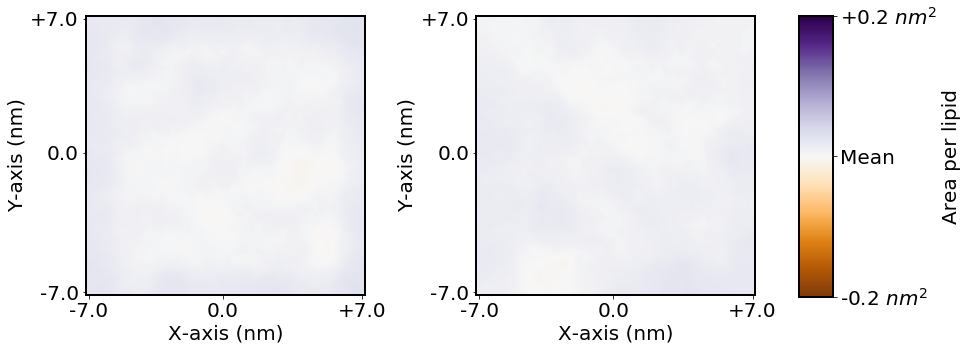

gH with/without cholesterol


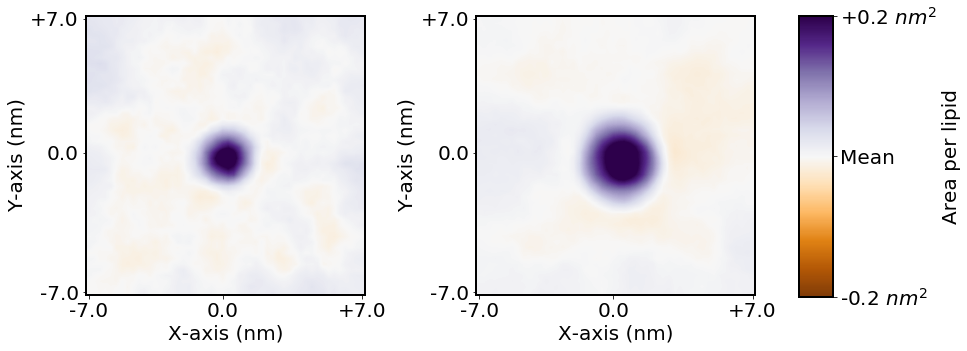

NP0 with/without cholesterol


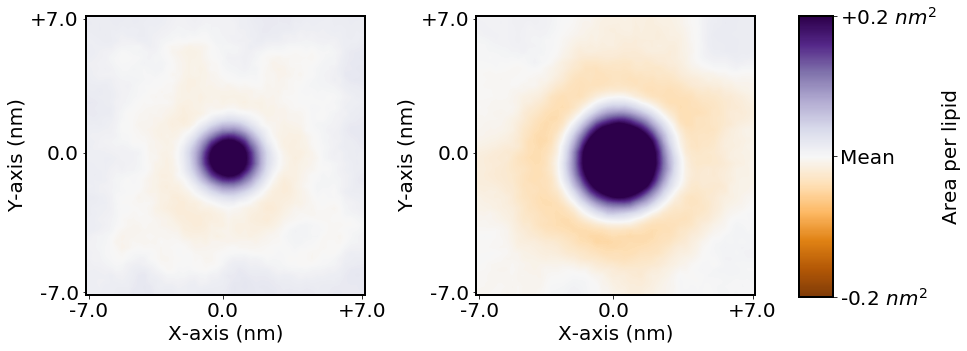

gHNP with/without cholesterol (Binding mode 1)


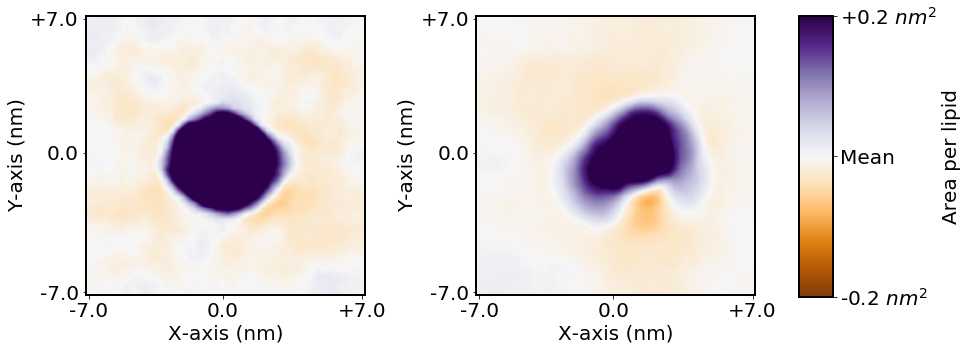

gHNP with/without cholesterol (Binding mode 2)


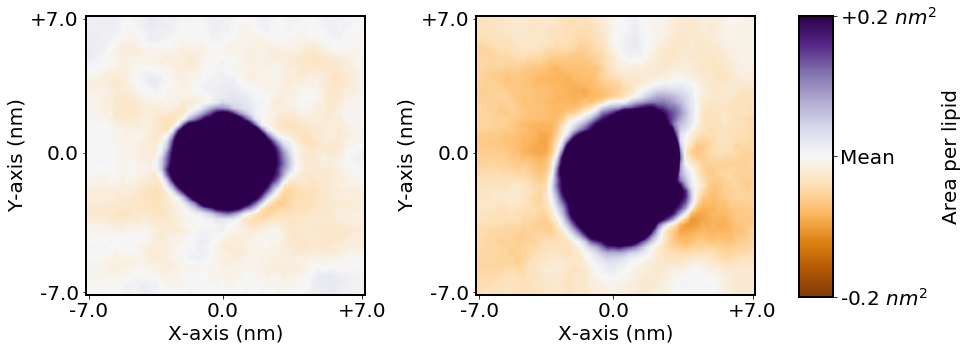

In [10]:
print("POPC/POPC:CHOL")
plot_apl(p_apls)
print("gH with/without cholesterol")
plot_apl(g_apls)
print("NP0 with/without cholesterol")
plot_apl(n0_apls)
print("gHNP with/without cholesterol (Binding mode 1)")
plot_apl(n11_apls)
print("gHNP with/without cholesterol (Binding mode 2)")
plot_apl(n12_apls)

In [41]:
n15_pt_apl, n15_pt_apl_std = read_text_xy_map("APL/NP61-POPC5-46_PRO1-3_Pt_aplxy_PO4.sfu", tini=2895000, tfin=3000000, angstrom=True, L=15.0)
n162_pt_apl, n162_pt_apl_std = read_text_xy_map("APL/NP61-POPC6-46_PRO1_Pt_aplxy_PO4.sfu", tini=864000, tfin=1000000, angstrom=True, L=12.0)

2000000
2000080
2000160
2000240
2000320
2000400
2000480
2000560
2000640
2000720
2000800
2000880
2000960
2001040
2001120
2001200
2001280
2001360
2001440
2001520
2001600
2001680
2001760
2001840
2001920
2002000
2002080
2002160
2002240
2002320
2002400
2002480
2002560
2002640
2002720
2002800
2002880
2002960
2003040
2003120
2003200
2003280
2003360
2003440
2003520
2003600
2003680
2003760
2003840
2003920
2004000
2004080
2004160
2004240
2004320
2004400
2004480
2004560
2004640
2004720
2004800
2004880
2004960
2005040
2005120
2005200
2005280
2005360
2005440
2005520
2005600
2005680
2005760
2005840
2005920
2006000
2006080
2006160
2006240
2006320
2006400
2006480
2006560
2006640
2006720
2006800
2006880
2006960
2007040
2007120
2007200
2007280
2007360
2007440
2007520
2007600
2007680
2007760
2007840
2007920
2008000
2008080
2008160
2008240
2008320
2008400
2008480
2008560
2008640
2008720
2008800
2008880
2008960
2009040
2009120
2009200
2009280
2009360
2009440
2009520
2009600
2009680
2009760
2009840
2009920


2100320
2100400
2100480
2100560
2100640
2100720
2100800
2100880
2100960
2101040
2101120
2101200
2101280
2101360
2101440
2101520
2101600
2101680
2101760
2101840
2101920
2102000
2102080
2102160
2102240
2102320
2102400
2102480
2102560
2102640
2102720
2102800
2102880
2102960
2103040
2103120
2103200
2103280
2103360
2103440
2103520
2103600
2103680
2103760
2103840
2103920
2104000
2104080
2104160
2104240
2104320
2104400
2104480
2104560
2104640
2104720
2104800
2104880
2104960
2105040
2105120
2105200
2105280
2105360
2105440
2105520
2105600
2105680
2105760
2105840
2105920
2106000
2106080
2106160
2106240
2106320
2106400
2106480
2106560
2106640
2106720
2106800
2106880
2106960
2107040
2107120
2107200
2107280
2107360
2107440
2107520
2107600
2107680
2107760
2107840
2107920
2108000
2108080
2108160
2108240
2108320
2108400
2108480
2108560
2108640
2108720
2108800
2108880
2108960
2109040
2109120
2109200
2109280
2109360
2109440
2109520
2109600
2109680
2109760
2109840
2109920
2110000
2110080
2110160
2110240


2288880
2288960
2289040
2289120
2289200
2289280
2289360
2289440
2289520
2289600
2289680
2289760
2289840
2289920
2290000
2290080
2290160
2290240
2290320
2290400
2290480
2290560
2290640
2290720
2290800
2290880
2290960
2291040
2291120
2291200
2291280
2291360
2291440
2291520
2291600
2291680
2291760
2291840
2291920
2292000
2292080
2292160
2292240
2292320
2292400
2292480
2292560
2292640
2292720
2292800
2292880
2292960
2293040
2293120
2293200
2293280
2293360
2293440
2293520
2293600
2293680
2293760
2293840
2293920
2294000
2294080
2294160
2294240
2294320
2294400
2294480
2294560
2294640
2294720
2294800
2294880
2294960
2295040
2295120
2295200
2295280
2295360
2295440
2295520
2295600
2295680
2295760
2295840
2295920
2296000
2296080
2296160
2296240
2296320
2296400
2296480
2296560
2296640
2296720
2296800
2296880
2296960
2297040
2297120
2297200
2297280
2297360
2297440
2297520
2297600
2297680
2297760
2297840
2297920
2298000
2298080
2298160
2298240
2298320
2298400
2298480
2298560
2298640
2298720
2298800


2380160
2380240
2380320
2380400
2380480
2380560
2380640
2380720
2380800
2380880
2380960
2381040
2381120
2381200
2381280
2381360
2381440
2381520
2381600
2381680
2381760
2381840
2381920
2382000
2382080
2382160
2382240
2382320
2382400
2382480
2382560
2382640
2382720
2382800
2382880
2382960
2383040
2383120
2383200
2383280
2383360
2383440
2383520
2383600
2383680
2383760
2383840
2383920
2384000
2384080
2384160
2384240
2384320
2384400
2384480
2384560
2384640
2384720
2384800
2384880
2384960
2385040
2385120
2385200
2385280
2385360
2385440
2385520
2385600
2385680
2385760
2385840
2385920
2386000
2386080
2386160
2386240
2386320
2386400
2386480
2386560
2386640
2386720
2386800
2386880
2386960
2387040
2387120
2387200
2387280
2387360
2387440
2387520
2387600
2387680
2387760
2387840
2387920
2388000
2388080
2388160
2388240
2388320
2388400
2388480
2388560
2388640
2388720
2388800
2388880
2388960
2389040
2389120
2389200
2389280
2389360
2389440
2389520
2389600
2389680
2389760
2389840
2389920
2390000
2390080


2584720
2584800
2584880
2584960
2585040
2585120
2585200
2585280
2585360
2585440
2585520
2585600
2585680
2585760
2585840
2585920
2586000
2586080
2586160
2586240
2586320
2586400
2586480
2586560
2586640
2586720
2586800
2586880
2586960
2587040
2587120
2587200
2587280
2587360
2587440
2587520
2587600
2587680
2587760
2587840
2587920
2588000
2588080
2588160
2588240
2588320
2588400
2588480
2588560
2588640
2588720
2588800
2588880
2588960
2589040
2589120
2589200
2589280
2589360
2589440
2589520
2589600
2589680
2589760
2589840
2589920
2590000
2590080
2590160
2590240
2590320
2590400
2590480
2590560
2590640
2590720
2590800
2590880
2590960
2591040
2591120
2591200
2591280
2591360
2591440
2591520
2591600
2591680
2591760
2591840
2591920
2592000
2592080
2592160
2592240
2592320
2592400
2592480
2592560
2592640
2592720
2592800
2592880
2592960
2593040
2593120
2593200
2593280
2593360
2593440
2593520
2593600
2593680
2593760
2593840
2593920
2594000
2594080
2594160
2594240
2594320
2594400
2594480
2594560
2594640


2740000
2740080
2740160
2740240
2740320
2740400
2740480
2740560
2740640
2740720
2740800
2740880
2740960
2741040
2741120
2741200
2741280
2741360
2741440
2741520
2741600
2741680
2741760
2741840
2741920
2742000
2742080
2742160
2742240
2742320
2742400
2742480
2742560
2742640
2742720
2742800
2742880
2742960
2743040
2743120
2743200
2743280
2743360
2743440
2743520
2743600
2743680
2743760
2743840
2743920
2744000
2744080
2744160
2744240
2744320
2744400
2744480
2744560
2744640
2744720
2744800
2744880
2744960
2745040
2745120
2745200
2745280
2745360
2745440
2745520
2745600
2745680
2745760
2745840
2745920
2746000
2746080
2746160
2746240
2746320
2746400
2746480
2746560
2746640
2746720
2746800
2746880
2746960
2747040
2747120
2747200
2747280
2747360
2747440
2747520
2747600
2747680
2747760
2747840
2747920
2748000
2748080
2748160
2748240
2748320
2748400
2748480
2748560
2748640
2748720
2748800
2748880
2748960
2749040
2749120
2749200
2749280
2749360
2749440
2749520
2749600
2749680
2749760
2749840
2749920


2887680
2887760
2887840
2887920
2888000
2888080
2888160
2888240
2888320
2888400
2888480
2888560
2888640
2888720
2888800
2888880
2888960
2889040
2889120
2889200
2889280
2889360
2889440
2889520
2889600
2889680
2889760
2889840
2889920
2890000
2890080
2890160
2890240
2890320
2890400
2890480
2890560
2890640
2890720
2890800
2890880
2890960
2891040
2891120
2891200
2891280
2891360
2891440
2891520
2891600
2891680
2891760
2891840
2891920
2892000
2892080
2892160
2892240
2892320
2892400
2892480
2892560
2892640
2892720
2892800
2892880
2892960
2893040
2893120
2893200
2893280
2893360
2893440
2893520
2893600
2893680
2893760
2893840
2893920
2894000
2894080
2894160
2894240
2894320
2894400
2894480
2894560
2894640
2894720
2894800
2894880
2894960
2895040
2895120
2895200
2895280
2895360
2895440
2895520
2895600
2895680
2895760
2895840
2895920
2896000
2896080
2896160
2896240
2896320
2896400
2896480
2896560
2896640
2896720
2896800
2896880
2896960
2897040
2897120
2897200
2897280
2897360
2897440
2897520
2897600


2969680
2969760
2969840
2969920
2970000
2970080
2970160
2970240
2970320
2970400
2970480
2970560
2970640
2970720
2970800
2970880
2970960
2971040
2971120
2971200
2971280
2971360
2971440
2971520
2971600
2971680
2971760
2971840
2971920
2972000
2972080
2972160
2972240
2972320
2972400
2972480
2972560
2972640
2972720
2972800
2972880
2972960
2973040
2973120
2973200
2973280
2973360
2973440
2973520
2973600
2973680
2973760
2973840
2973920
2974000
2974080
2974160
2974240
2974320
2974400
2974480
2974560
2974640
2974720
2974800
2974880
2974960
2975040
2975120
2975200
2975280
2975360
2975440
2975520
2975600
2975680
2975760
2975840
2975920
2976000
2976080
2976160
2976240
2976320
2976400
2976480
2976560
2976640
2976720
2976800
2976880
2976960
2977040
2977120
2977200
2977280
2977360
2977440
2977520
2977600
2977680
2977760
2977840
2977920
2978000
2978080
2978160
2978240
2978320
2978400
2978480
2978560
2978640
2978720
2978800
2978880
2978960
2979040
2979120
2979200
2979280
2979360
2979440
2979520
2979600


136960
137040
137120
137200
137280
137360
137440
137520
137600
137680
137760
137840
137920
138000
138080
138160
138240
138320
138400
138480
138560
138640
138720
138800
138880
138960
139040
139120
139200
139280
139360
139440
139520
139600
139680
139760
139840
139920
140000
140080
140160
140240
140320
140400
140480
140560
140640
140720
140800
140880
140960
141040
141120
141200
141280
141360
141440
141520
141600
141680
141760
141840
141920
142000
142080
142160
142240
142320
142400
142480
142560
142640
142720
142800
142880
142960
143040
143120
143200
143280
143360
143440
143520
143600
143680
143760
143840
143920
144000
144080
144160
144240
144320
144400
144480
144560
144640
144720
144800
144880
144960
145040
145120
145200
145280
145360
145440
145520
145600
145680
145760
145840
145920
146000
146080
146160
146240
146320
146400
146480
146560
146640
146720
146800
146880
146960
147040
147120
147200
147280
147360
147440
147520
147600
147680
147760
147840
147920
148000
148080
148160
148240
148320

296960
297040
297120
297200
297280
297360
297440
297520
297600
297680
297760
297840
297920
298000
298080
298160
298240
298320
298400
298480
298560
298640
298720
298800
298880
298960
299040
299120
299200
299280
299360
299440
299520
299600
299680
299760
299840
299920
300000
300080
300160
300240
300320
300400
300480
300560
300640
300720
300800
300880
300960
301040
301120
301200
301280
301360
301440
301520
301600
301680
301760
301840
301920
302000
302080
302160
302240
302320
302400
302480
302560
302640
302720
302800
302880
302960
303040
303120
303200
303280
303360
303440
303520
303600
303680
303760
303840
303920
304000
304080
304160
304240
304320
304400
304480
304560
304640
304720
304800
304880
304960
305040
305120
305200
305280
305360
305440
305520
305600
305680
305760
305840
305920
306000
306080
306160
306240
306320
306400
306480
306560
306640
306720
306800
306880
306960
307040
307120
307200
307280
307360
307440
307520
307600
307680
307760
307840
307920
308000
308080
308160
308240
308320

467840
467920
468000
468080
468160
468240
468320
468400
468480
468560
468640
468720
468800
468880
468960
469040
469120
469200
469280
469360
469440
469520
469600
469680
469760
469840
469920
470000
470080
470160
470240
470320
470400
470480
470560
470640
470720
470800
470880
470960
471040
471120
471200
471280
471360
471440
471520
471600
471680
471760
471840
471920
472000
472080
472160
472240
472320
472400
472480
472560
472640
472720
472800
472880
472960
473040
473120
473200
473280
473360
473440
473520
473600
473680
473760
473840
473920
474000
474080
474160
474240
474320
474400
474480
474560
474640
474720
474800
474880
474960
475040
475120
475200
475280
475360
475440
475520
475600
475680
475760
475840
475920
476000
476080
476160
476240
476320
476400
476480
476560
476640
476720
476800
476880
476960
477040
477120
477200
477280
477360
477440
477520
477600
477680
477760
477840
477920
478000
478080
478160
478240
478320
478400
478480
478560
478640
478720
478800
478880
478960
479040
479120
479200

652160
652240
652320
652400
652480
652560
652640
652720
652800
652880
652960
653040
653120
653200
653280
653360
653440
653520
653600
653680
653760
653840
653920
654000
654080
654160
654240
654320
654400
654480
654560
654640
654720
654800
654880
654960
655040
655120
655200
655280
655360
655440
655520
655600
655680
655760
655840
655920
656000
656080
656160
656240
656320
656400
656480
656560
656640
656720
656800
656880
656960
657040
657120
657200
657280
657360
657440
657520
657600
657680
657760
657840
657920
658000
658080
658160
658240
658320
658400
658480
658560
658640
658720
658800
658880
658960
659040
659120
659200
659280
659360
659440
659520
659600
659680
659760
659840
659920
660000
660080
660160
660240
660320
660400
660480
660560
660640
660720
660800
660880
660960
661040
661120
661200
661280
661360
661440
661520
661600
661680
661760
661840
661920
662000
662080
662160
662240
662320
662400
662480
662560
662640
662720
662800
662880
662960
663040
663120
663200
663280
663360
663440
663520

816800
816880
816960
817040
817120
817200
817280
817360
817440
817520
817600
817680
817760
817840
817920
818000
818080
818160
818240
818320
818400
818480
818560
818640
818720
818800
818880
818960
819040
819120
819200
819280
819360
819440
819520
819600
819680
819760
819840
819920
820000
820080
820160
820240
820320
820400
820480
820560
820640
820720
820800
820880
820960
821040
821120
821200
821280
821360
821440
821520
821600
821680
821760
821840
821920
822000
822080
822160
822240
822320
822400
822480
822560
822640
822720
822800
822880
822960
823040
823120
823200
823280
823360
823440
823520
823600
823680
823760
823840
823920
824000
824080
824160
824240
824320
824400
824480
824560
824640
824720
824800
824880
824960
825040
825120
825200
825280
825360
825440
825520
825600
825680
825760
825840
825920
826000
826080
826160
826240
826320
826400
826480
826560
826640
826720
826800
826880
826960
827040
827120
827200
827280
827360
827440
827520
827600
827680
827760
827840
827920
828000
828080
828160

911280
911360
911440
911520
911600
911680
911760
911840
911920
912000
912080
912160
912240
912320
912400
912480
912560
912640
912720
912800
912880
912960
913040
913120
913200
913280
913360
913440
913520
913600
913680
913760
913840
913920
914000
914080
914160
914240
914320
914400
914480
914560
914640
914720
914800
914880
914960
915040
915120
915200
915280
915360
915440
915520
915600
915680
915760
915840
915920
916000
916080
916160
916240
916320
916400
916480
916560
916640
916720
916800
916880
916960
917040
917120
917200
917280
917360
917440
917520
917600
917680
917760
917840
917920
918000
918080
918160
918240
918320
918400
918480
918560
918640
918720
918800
918880
918960
919040
919120
919200
919280
919360
919440
919520
919600
919680
919760
919840
919920
920000
920080
920160
920240
920320
920400
920480
920560
920640
920720
920800
920880
920960
921040
921120
921200
921280
921360
921440
921520
921600
921680
921760
921840
921920
922000
922080
922160
922240
922320
922400
922480
922560
922640

In [44]:
print("POPC -> gHNP-local")
average_map(n15_pt_apl, 6)#6 pixels is 1.56 nm
average_map(n15_pt_apl_std, 6)#6 pixels is 1.56 nm
print("POPC:CHOL -> gHNP-local (Binding mode 2)")
average_map(n162_pt_apl, 6)#6 pixels is 1.56 nm
average_map(n162_pt_apl_std, 6)#6 pixels is 1.56 nm

POPC -> gHNP-local
1.526 +/- 0.241
0.239 +/- 0.048
POPC:CHOL -> gHNP-local (Binding mode 2)
1.898 +/- 0.287
0.265 +/- 0.059


In [42]:
n12_pt_apls = [n15_pt_apl, n162_pt_apl]

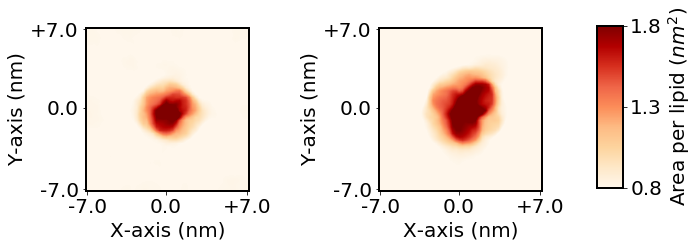

In [45]:
plot_apl(n12_pt_apls, fname='gHNP_Pt', delta=1., cmap='OrRd')

In [46]:
n15_ptopp_apl, n15_ptopp_apl_std = read_text_xy_map("APL/NP61-POPC5-46_PRO1-3_Ptopp_aplxy_PO4.sfu", tini=2895000, tfin=3000000, angstrom=True, L=15.0)
n162_ptopp_apl, n162_ptopp_apl_std = read_text_xy_map("APL/NP61-POPC6-46_PRO1_Ptopp_aplxy_PO4.sfu", tini=864000, tfin=1000000, angstrom=True, L=12.0)

2000000
2000080
2000160
2000240
2000320
2000400
2000480
2000560
2000640
2000720
2000800
2000880
2000960
2001040
2001120
2001200
2001280
2001360
2001440
2001520
2001600
2001680
2001760
2001840
2001920
2002000
2002080
2002160
2002240
2002320
2002400
2002480
2002560
2002640
2002720
2002800
2002880
2002960
2003040
2003120
2003200
2003280
2003360
2003440
2003520
2003600
2003680
2003760
2003840
2003920
2004000
2004080
2004160
2004240
2004320
2004400
2004480
2004560
2004640
2004720
2004800
2004880
2004960
2005040
2005120
2005200
2005280
2005360
2005440
2005520
2005600
2005680
2005760
2005840
2005920
2006000
2006080
2006160
2006240
2006320
2006400
2006480
2006560
2006640
2006720
2006800
2006880
2006960
2007040
2007120
2007200
2007280
2007360
2007440
2007520
2007600
2007680
2007760
2007840
2007920
2008000
2008080
2008160
2008240
2008320
2008400
2008480
2008560
2008640
2008720
2008800
2008880
2008960
2009040
2009120
2009200
2009280
2009360
2009440
2009520
2009600
2009680
2009760
2009840
2009920


2141440
2141520
2141600
2141680
2141760
2141840
2141920
2142000
2142080
2142160
2142240
2142320
2142400
2142480
2142560
2142640
2142720
2142800
2142880
2142960
2143040
2143120
2143200
2143280
2143360
2143440
2143520
2143600
2143680
2143760
2143840
2143920
2144000
2144080
2144160
2144240
2144320
2144400
2144480
2144560
2144640
2144720
2144800
2144880
2144960
2145040
2145120
2145200
2145280
2145360
2145440
2145520
2145600
2145680
2145760
2145840
2145920
2146000
2146080
2146160
2146240
2146320
2146400
2146480
2146560
2146640
2146720
2146800
2146880
2146960
2147040
2147120
2147200
2147280
2147360
2147440
2147520
2147600
2147680
2147760
2147840
2147920
2148000
2148080
2148160
2148240
2148320
2148400
2148480
2148560
2148640
2148720
2148800
2148880
2148960
2149040
2149120
2149200
2149280
2149360
2149440
2149520
2149600
2149680
2149760
2149840
2149920
2150000
2150080
2150160
2150240
2150320
2150400
2150480
2150560
2150640
2150720
2150800
2150880
2150960
2151040
2151120
2151200
2151280
2151360


2249520
2249600
2249680
2249760
2249840
2249920
2250000
2250080
2250160
2250240
2250320
2250400
2250480
2250560
2250640
2250720
2250800
2250880
2250960
2251040
2251120
2251200
2251280
2251360
2251440
2251520
2251600
2251680
2251760
2251840
2251920
2252000
2252080
2252160
2252240
2252320
2252400
2252480
2252560
2252640
2252720
2252800
2252880
2252960
2253040
2253120
2253200
2253280
2253360
2253440
2253520
2253600
2253680
2253760
2253840
2253920
2254000
2254080
2254160
2254240
2254320
2254400
2254480
2254560
2254640
2254720
2254800
2254880
2254960
2255040
2255120
2255200
2255280
2255360
2255440
2255520
2255600
2255680
2255760
2255840
2255920
2256000
2256080
2256160
2256240
2256320
2256400
2256480
2256560
2256640
2256720
2256800
2256880
2256960
2257040
2257120
2257200
2257280
2257360
2257440
2257520
2257600
2257680
2257760
2257840
2257920
2258000
2258080
2258160
2258240
2258320
2258400
2258480
2258560
2258640
2258720
2258800
2258880
2258960
2259040
2259120
2259200
2259280
2259360
2259440


2409520
2409600
2409680
2409760
2409840
2409920
2410000
2410080
2410160
2410240
2410320
2410400
2410480
2410560
2410640
2410720
2410800
2410880
2410960
2411040
2411120
2411200
2411280
2411360
2411440
2411520
2411600
2411680
2411760
2411840
2411920
2412000
2412080
2412160
2412240
2412320
2412400
2412480
2412560
2412640
2412720
2412800
2412880
2412960
2413040
2413120
2413200
2413280
2413360
2413440
2413520
2413600
2413680
2413760
2413840
2413920
2414000
2414080
2414160
2414240
2414320
2414400
2414480
2414560
2414640
2414720
2414800
2414880
2414960
2415040
2415120
2415200
2415280
2415360
2415440
2415520
2415600
2415680
2415760
2415840
2415920
2416000
2416080
2416160
2416240
2416320
2416400
2416480
2416560
2416640
2416720
2416800
2416880
2416960
2417040
2417120
2417200
2417280
2417360
2417440
2417520
2417600
2417680
2417760
2417840
2417920
2418000
2418080
2418160
2418240
2418320
2418400
2418480
2418560
2418640
2418720
2418800
2418880
2418960
2419040
2419120
2419200
2419280
2419360
2419440


2569440
2569520
2569600
2569680
2569760
2569840
2569920
2570000
2570080
2570160
2570240
2570320
2570400
2570480
2570560
2570640
2570720
2570800
2570880
2570960
2571040
2571120
2571200
2571280
2571360
2571440
2571520
2571600
2571680
2571760
2571840
2571920
2572000
2572080
2572160
2572240
2572320
2572400
2572480
2572560
2572640
2572720
2572800
2572880
2572960
2573040
2573120
2573200
2573280
2573360
2573440
2573520
2573600
2573680
2573760
2573840
2573920
2574000
2574080
2574160
2574240
2574320
2574400
2574480
2574560
2574640
2574720
2574800
2574880
2574960
2575040
2575120
2575200
2575280
2575360
2575440
2575520
2575600
2575680
2575760
2575840
2575920
2576000
2576080
2576160
2576240
2576320
2576400
2576480
2576560
2576640
2576720
2576800
2576880
2576960
2577040
2577120
2577200
2577280
2577360
2577440
2577520
2577600
2577680
2577760
2577840
2577920
2578000
2578080
2578160
2578240
2578320
2578400
2578480
2578560
2578640
2578720
2578800
2578880
2578960
2579040
2579120
2579200
2579280
2579360


2730160
2730240
2730320
2730400
2730480
2730560
2730640
2730720
2730800
2730880
2730960
2731040
2731120
2731200
2731280
2731360
2731440
2731520
2731600
2731680
2731760
2731840
2731920
2732000
2732080
2732160
2732240
2732320
2732400
2732480
2732560
2732640
2732720
2732800
2732880
2732960
2733040
2733120
2733200
2733280
2733360
2733440
2733520
2733600
2733680
2733760
2733840
2733920
2734000
2734080
2734160
2734240
2734320
2734400
2734480
2734560
2734640
2734720
2734800
2734880
2734960
2735040
2735120
2735200
2735280
2735360
2735440
2735520
2735600
2735680
2735760
2735840
2735920
2736000
2736080
2736160
2736240
2736320
2736400
2736480
2736560
2736640
2736720
2736800
2736880
2736960
2737040
2737120
2737200
2737280
2737360
2737440
2737520
2737600
2737680
2737760
2737840
2737920
2738000
2738080
2738160
2738240
2738320
2738400
2738480
2738560
2738640
2738720
2738800
2738880
2738960
2739040
2739120
2739200
2739280
2739360
2739440
2739520
2739600
2739680
2739760
2739840
2739920
2740000
2740080


2889360
2889440
2889520
2889600
2889680
2889760
2889840
2889920
2890000
2890080
2890160
2890240
2890320
2890400
2890480
2890560
2890640
2890720
2890800
2890880
2890960
2891040
2891120
2891200
2891280
2891360
2891440
2891520
2891600
2891680
2891760
2891840
2891920
2892000
2892080
2892160
2892240
2892320
2892400
2892480
2892560
2892640
2892720
2892800
2892880
2892960
2893040
2893120
2893200
2893280
2893360
2893440
2893520
2893600
2893680
2893760
2893840
2893920
2894000
2894080
2894160
2894240
2894320
2894400
2894480
2894560
2894640
2894720
2894800
2894880
2894960
2895040
2895120
2895200
2895280
2895360
2895440
2895520
2895600
2895680
2895760
2895840
2895920
2896000
2896080
2896160
2896240
2896320
2896400
2896480
2896560
2896640
2896720
2896800
2896880
2896960
2897040
2897120
2897200
2897280
2897360
2897440
2897520
2897600
2897680
2897760
2897840
2897920
2898000
2898080
2898160
2898240
2898320
2898400
2898480
2898560
2898640
2898720
2898800
2898880
2898960
2899040
2899120
2899200
2899280


2972880
2972960
2973040
2973120
2973200
2973280
2973360
2973440
2973520
2973600
2973680
2973760
2973840
2973920
2974000
2974080
2974160
2974240
2974320
2974400
2974480
2974560
2974640
2974720
2974800
2974880
2974960
2975040
2975120
2975200
2975280
2975360
2975440
2975520
2975600
2975680
2975760
2975840
2975920
2976000
2976080
2976160
2976240
2976320
2976400
2976480
2976560
2976640
2976720
2976800
2976880
2976960
2977040
2977120
2977200
2977280
2977360
2977440
2977520
2977600
2977680
2977760
2977840
2977920
2978000
2978080
2978160
2978240
2978320
2978400
2978480
2978560
2978640
2978720
2978800
2978880
2978960
2979040
2979120
2979200
2979280
2979360
2979440
2979520
2979600
2979680
2979760
2979840
2979920
2980000
2980080
2980160
2980240
2980320
2980400
2980480
2980560
2980640
2980720
2980800
2980880
2980960
2981040
2981120
2981200
2981280
2981360
2981440
2981520
2981600
2981680
2981760
2981840
2981920
2982000
2982080
2982160
2982240
2982320
2982400
2982480
2982560
2982640
2982720
2982800


166240
166320
166400
166480
166560
166640
166720
166800
166880
166960
167040
167120
167200
167280
167360
167440
167520
167600
167680
167760
167840
167920
168000
168080
168160
168240
168320
168400
168480
168560
168640
168720
168800
168880
168960
169040
169120
169200
169280
169360
169440
169520
169600
169680
169760
169840
169920
170000
170080
170160
170240
170320
170400
170480
170560
170640
170720
170800
170880
170960
171040
171120
171200
171280
171360
171440
171520
171600
171680
171760
171840
171920
172000
172080
172160
172240
172320
172400
172480
172560
172640
172720
172800
172880
172960
173040
173120
173200
173280
173360
173440
173520
173600
173680
173760
173840
173920
174000
174080
174160
174240
174320
174400
174480
174560
174640
174720
174800
174880
174960
175040
175120
175200
175280
175360
175440
175520
175600
175680
175760
175840
175920
176000
176080
176160
176240
176320
176400
176480
176560
176640
176720
176800
176880
176960
177040
177120
177200
177280
177360
177440
177520
177600

326160
326240
326320
326400
326480
326560
326640
326720
326800
326880
326960
327040
327120
327200
327280
327360
327440
327520
327600
327680
327760
327840
327920
328000
328080
328160
328240
328320
328400
328480
328560
328640
328720
328800
328880
328960
329040
329120
329200
329280
329360
329440
329520
329600
329680
329760
329840
329920
330000
330080
330160
330240
330320
330400
330480
330560
330640
330720
330800
330880
330960
331040
331120
331200
331280
331360
331440
331520
331600
331680
331760
331840
331920
332000
332080
332160
332240
332320
332400
332480
332560
332640
332720
332800
332880
332960
333040
333120
333200
333280
333360
333440
333520
333600
333680
333760
333840
333920
334000
334080
334160
334240
334320
334400
334480
334560
334640
334720
334800
334880
334960
335040
335120
335200
335280
335360
335440
335520
335600
335680
335760
335840
335920
336000
336080
336160
336240
336320
336400
336480
336560
336640
336720
336800
336880
336960
337040
337120
337200
337280
337360
337440
337520

498560
498640
498720
498800
498880
498960
499040
499120
499200
499280
499360
499440
499520
499600
499680
499760
499840
499920
500000
500080
500160
500240
500320
500400
500480
500560
500640
500720
500800
500880
500960
501040
501120
501200
501280
501360
501440
501520
501600
501680
501760
501840
501920
502000
502080
502160
502240
502320
502400
502480
502560
502640
502720
502800
502880
502960
503040
503120
503200
503280
503360
503440
503520
503600
503680
503760
503840
503920
504000
504080
504160
504240
504320
504400
504480
504560
504640
504720
504800
504880
504960
505040
505120
505200
505280
505360
505440
505520
505600
505680
505760
505840
505920
506000
506080
506160
506240
506320
506400
506480
506560
506640
506720
506800
506880
506960
507040
507120
507200
507280
507360
507440
507520
507600
507680
507760
507840
507920
508000
508080
508160
508240
508320
508400
508480
508560
508640
508720
508800
508880
508960
509040
509120
509200
509280
509360
509440
509520
509600
509680
509760
509840
509920

677600
677680
677760
677840
677920
678000
678080
678160
678240
678320
678400
678480
678560
678640
678720
678800
678880
678960
679040
679120
679200
679280
679360
679440
679520
679600
679680
679760
679840
679920
680000
680080
680160
680240
680320
680400
680480
680560
680640
680720
680800
680880
680960
681040
681120
681200
681280
681360
681440
681520
681600
681680
681760
681840
681920
682000
682080
682160
682240
682320
682400
682480
682560
682640
682720
682800
682880
682960
683040
683120
683200
683280
683360
683440
683520
683600
683680
683760
683840
683920
684000
684080
684160
684240
684320
684400
684480
684560
684640
684720
684800
684880
684960
685040
685120
685200
685280
685360
685440
685520
685600
685680
685760
685840
685920
686000
686080
686160
686240
686320
686400
686480
686560
686640
686720
686800
686880
686960
687040
687120
687200
687280
687360
687440
687520
687600
687680
687760
687840
687920
688000
688080
688160
688240
688320
688400
688480
688560
688640
688720
688800
688880
688960

841280
841360
841440
841520
841600
841680
841760
841840
841920
842000
842080
842160
842240
842320
842400
842480
842560
842640
842720
842800
842880
842960
843040
843120
843200
843280
843360
843440
843520
843600
843680
843760
843840
843920
844000
844080
844160
844240
844320
844400
844480
844560
844640
844720
844800
844880
844960
845040
845120
845200
845280
845360
845440
845520
845600
845680
845760
845840
845920
846000
846080
846160
846240
846320
846400
846480
846560
846640
846720
846800
846880
846960
847040
847120
847200
847280
847360
847440
847520
847600
847680
847760
847840
847920
848000
848080
848160
848240
848320
848400
848480
848560
848640
848720
848800
848880
848960
849040
849120
849200
849280
849360
849440
849520
849600
849680
849760
849840
849920
850000
850080
850160
850240
850320
850400
850480
850560
850640
850720
850800
850880
850960
851040
851120
851200
851280
851360
851440
851520
851600
851680
851760
851840
851920
852000
852080
852160
852240
852320
852400
852480
852560
852640

936080
936160
936240
936320
936400
936480
936560
936640
936720
936800
936880
936960
937040
937120
937200
937280
937360
937440
937520
937600
937680
937760
937840
937920
938000
938080
938160
938240
938320
938400
938480
938560
938640
938720
938800
938880
938960
939040
939120
939200
939280
939360
939440
939520
939600
939680
939760
939840
939920
940000
940080
940160
940240
940320
940400
940480
940560
940640
940720
940800
940880
940960
941040
941120
941200
941280
941360
941440
941520
941600
941680
941760
941840
941920
942000
942080
942160
942240
942320
942400
942480
942560
942640
942720
942800
942880
942960
943040
943120
943200
943280
943360
943440
943520
943600
943680
943760
943840
943920
944000
944080
944160
944240
944320
944400
944480
944560
944640
944720
944800
944880
944960
945040
945120
945200
945280
945360
945440
945520
945600
945680
945760
945840
945920
946000
946080
946160
946240
946320
946400
946480
946560
946640
946720
946800
946880
946960
947040
947120
947200
947280
947360
947440

In [47]:
print("POPC -> gHNP-local")
average_map(n15_ptopp_apl, 6)#6 pixels is 1.56 nm
average_map(n15_ptopp_apl_std, 6)#6 pixels is 1.56 nm
print("POPC:CHOL -> gHNP-local (Binding mode 2)")
average_map(n162_ptopp_apl, 6)#6 pixels is 1.56 nm
average_map(n162_ptopp_apl_std, 6)#6 pixels is 1.56 nm

POPC -> gHNP-local
0.614 +/- 0.012
0.086 +/- 0.005
POPC:CHOL -> gHNP-local (Binding mode 2)
0.818 +/- 0.024
0.118 +/- 0.006


In [48]:
n12_ptopp_apls = [n15_ptopp_apl, n162_ptopp_apl]

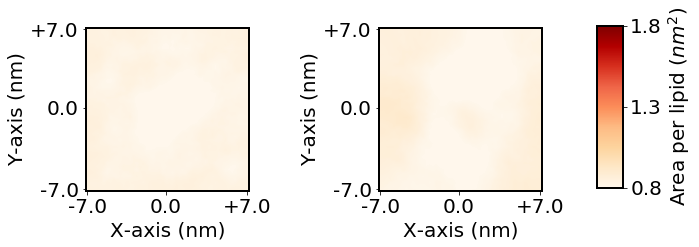

In [49]:
plot_apl(n12_ptopp_apls, fname='gHNP_Pt', delta=1., cmap='OrRd')